In [ ]:
pip install pandas numpy matplotlib seaborn scipy scikit-learn

In [ ]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Book6.xlsx to Book6.xlsx


In [ ]:
import pandas as pd

data = pd.read_excel('Book6.xlsx')

print(data.head())

              ID  Defect Area    IQR   TIV  WM Volume (Relative)  \
0  AD-002_S_1018         0.15  85.18  1359                  34.4   
1  AD-002_S_1018         0.45  85.14  1350                  34.1   
2  AD-002_S_1018         0.25  85.20  1342                  34.2   
3  AD-002_S_1018         0.09  85.16  1343                  33.6   
4  AD-005_S_0814         0.18  84.84  1373                  30.0   

   WM Volume (Absolute)  GM Volume (Relative)%  GM Volume (Absolute)  \
0                   468                   44.0                   598   
1                   460                   43.8                   592   
2                   458                   44.2                   593   
3                   451                   42.9                   576   
4                   412                   39.8                   546   

   CSF Volume (Relative)%  CSF Volume (Absolute)  Thickness       Date  
0                    21.5                    293  2.42-0.59 2006-12-18  
1           

       Defect Area         IQR          TIV  WM Volume (Relative)  \
count   305.000000  305.000000   305.000000            305.000000   
mean      0.337574   84.468590  1440.527869             32.157377   
min       0.000000   73.260000  1157.000000             20.300000   
25%       0.140000   84.870000  1342.000000             30.600000   
50%       0.280000   85.150000  1427.000000             32.100000   
75%       0.450000   85.270000  1547.000000             34.000000   
max       1.710000   85.990000  1981.000000             37.600000   
std       0.269673    2.093886   145.713287              2.443766   

       WM Volume (Absolute)  GM Volume (Relative)%  GM Volume (Absolute)  \
count            305.000000             305.000000            305.000000   
mean             464.186885              41.111475            589.032787   
min              344.000000              28.200000            452.000000   
25%              419.000000              39.500000            551.000000  

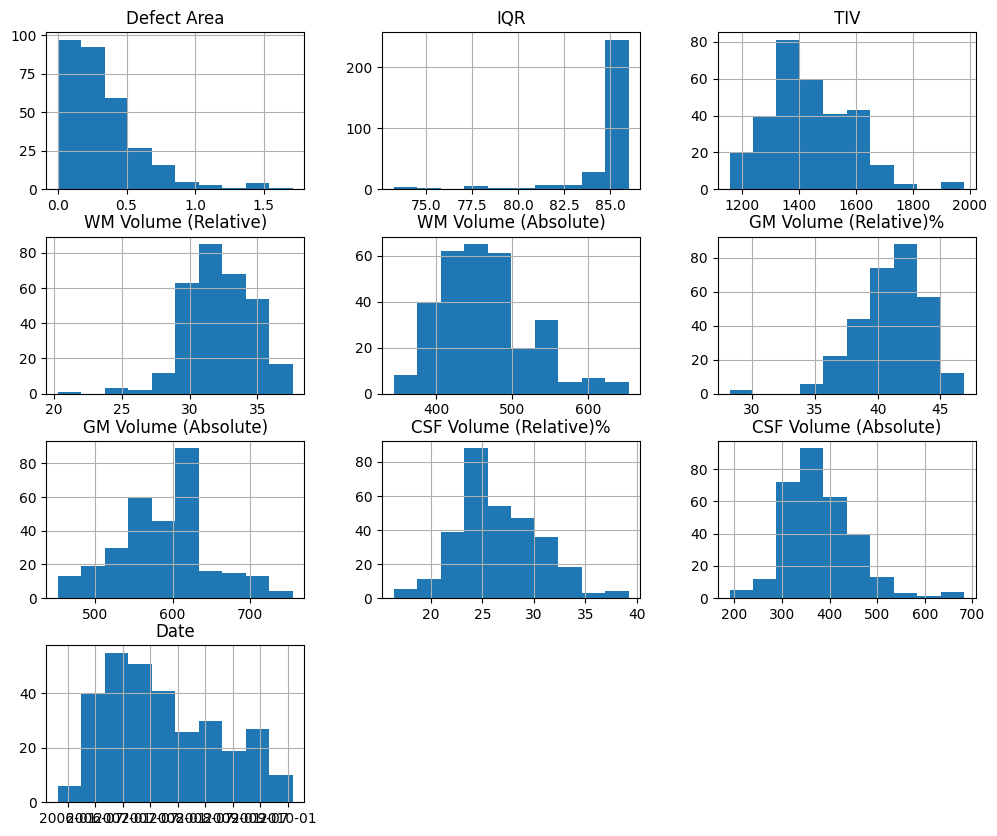

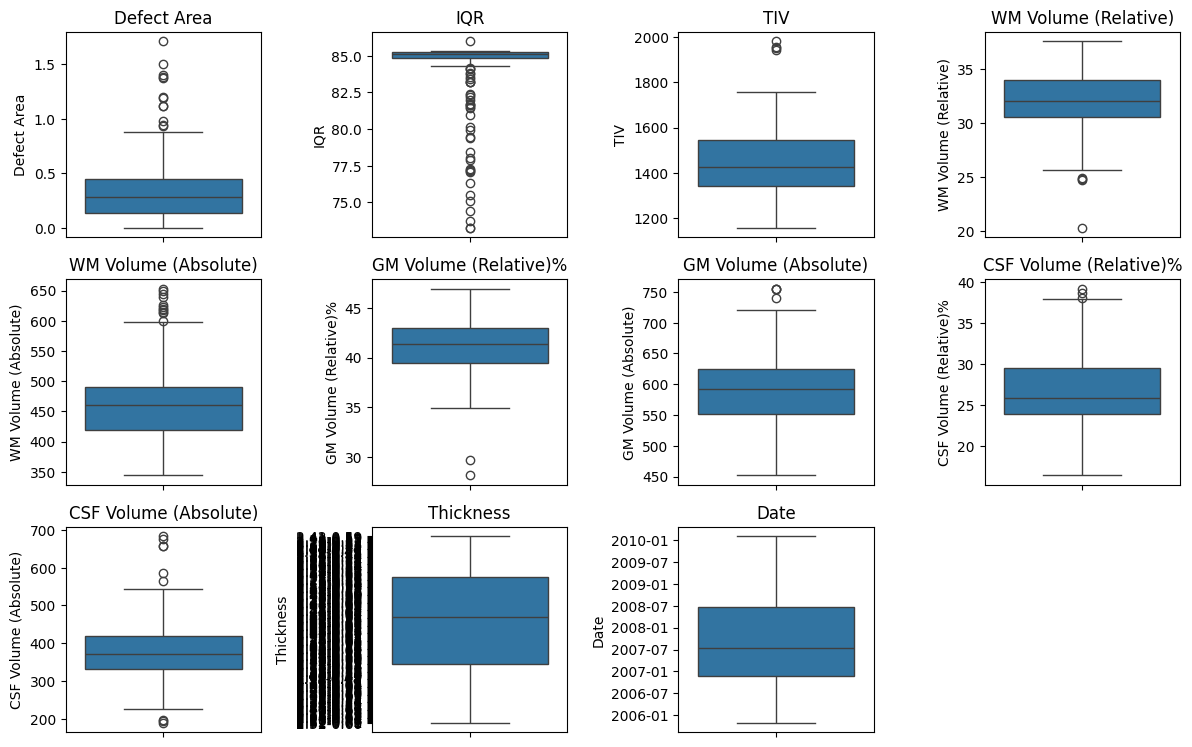

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.describe())


data.hist(figsize=(12, 10))
plt.show()

plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
print(data.dtypes)

ID                                object
Defect Area                      float64
IQR                              float64
TIV                                int64
WM Volume (Relative)             float64
WM Volume (Absolute)               int64
GM Volume (Relative)%            float64
GM Volume (Absolute)               int64
CSF Volume (Relative)%           float64
CSF Volume (Absolute)              int64
Thickness                         object
Date                      datetime64[ns]
dtype: object


In [ ]:

numeric_data = data.select_dtypes(include=[float, int])


In [ ]:

corr = numeric_data.corr()

print(corr)


                        Defect Area       IQR       TIV  WM Volume (Relative)  \
Defect Area                1.000000 -0.418118 -0.161516             -0.157913   
IQR                       -0.418118  1.000000 -0.044452              0.163083   
TIV                       -0.161516 -0.044452  1.000000              0.110778   
WM Volume (Relative)      -0.157913  0.163083  0.110778              1.000000   
WM Volume (Absolute)      -0.220106  0.069180  0.836437              0.578425   
GM Volume (Relative)%     -0.016343  0.216736 -0.210635              0.322697   
GM Volume (Absolute)      -0.157136  0.082439  0.821368              0.283057   
CSF Volume (Relative)%     0.128052 -0.270530  0.075573             -0.735133   
CSF Volume (Absolute)      0.023638 -0.246973  0.586505             -0.532756   

                        WM Volume (Absolute)  GM Volume (Relative)%  \
Defect Area                        -0.220106              -0.016343   
IQR                                 0.069180   

       Defect Area         IQR          TIV  WM Volume (Relative)  \
count   305.000000  305.000000   305.000000            305.000000   
mean      0.337574   84.468590  1440.527869             32.157377   
min       0.000000   73.260000  1157.000000             20.300000   
25%       0.140000   84.870000  1342.000000             30.600000   
50%       0.280000   85.150000  1427.000000             32.100000   
75%       0.450000   85.270000  1547.000000             34.000000   
max       1.710000   85.990000  1981.000000             37.600000   
std       0.269673    2.093886   145.713287              2.443766   

       WM Volume (Absolute)  GM Volume (Relative)%  GM Volume (Absolute)  \
count            305.000000             305.000000            305.000000   
mean             464.186885              41.111475            589.032787   
min              344.000000              28.200000            452.000000   
25%              419.000000              39.500000            551.000000  

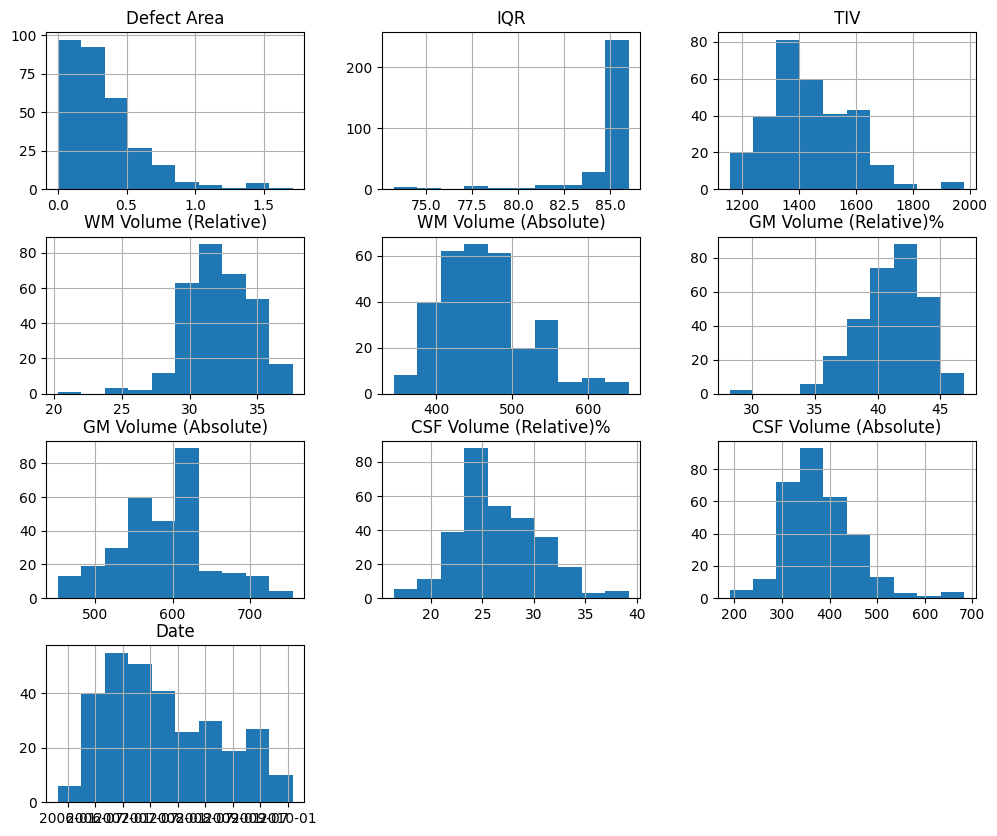

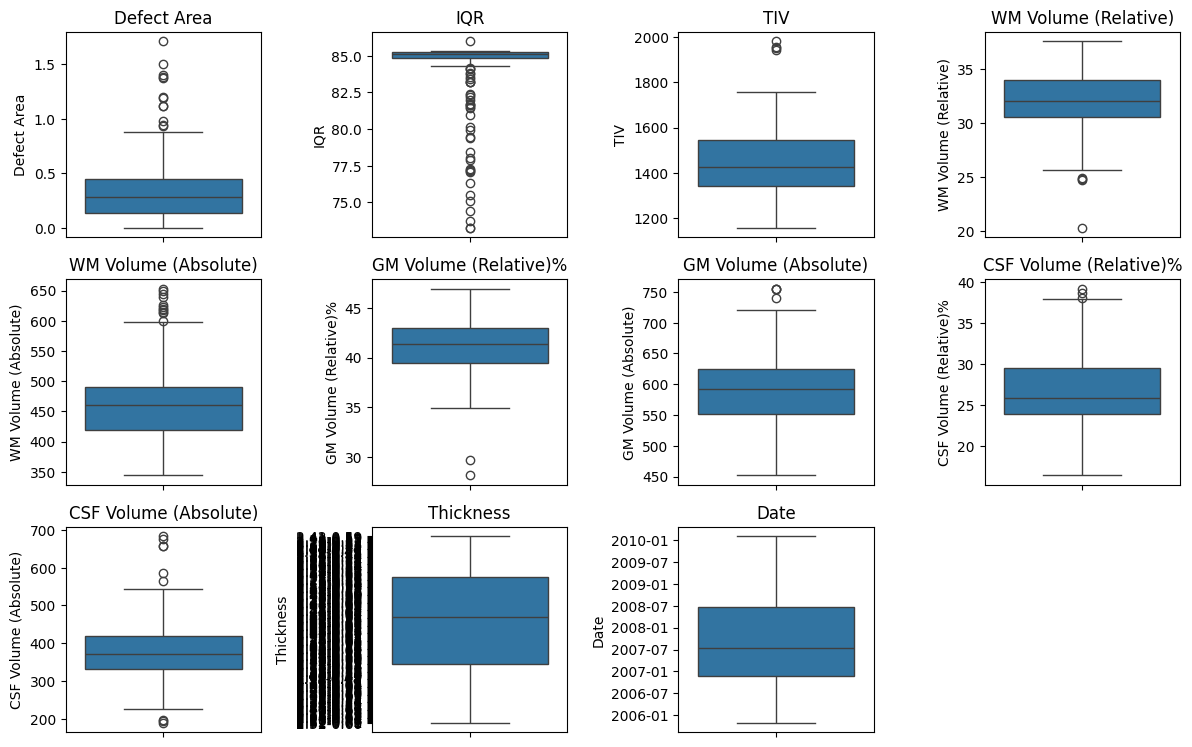

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


print(data.describe())


data.hist(figsize=(12, 10))
plt.show()


plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind, f_oneway


group1 = data[data['Group'] == 'Group1']['GM Volume (Absolute)']
group2 = data[data['Group'] == 'Group2']['GM Volume (Absolute)']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')

group1 = data[data['Group'] == 'Group1']['GM Volume (Absolute)']
group2 = data[data['Group'] == 'Group2']['GM Volume (Absolute)']
group3 = data[data['Group'] == 'Group3']['GM Volume (Absolute)']

f_stat, p_value = f_oneway(group1, group2, group3)
print(f'ANOVA: F-statistic = {f_stat}, p-value = {p_value}')


KeyError: 'Group'

In [ ]:

print(data.columns)

Index(['ID', 'Defect Area', 'IQR', 'TIV', 'WM Volume (Relative)',
       'WM Volume (Absolute)', 'GM Volume (Relative)%', 'GM Volume (Absolute)',
       'CSF Volume (Relative)%', 'CSF Volume (Absolute)', 'Thickness', 'Date'],
      dtype='object')


In [ ]:

print(data.columns)


print(data.head())

Index(['ID', 'Defect Area', 'IQR', 'TIV', 'WM Volume (Relative)',
       'WM Volume (Absolute)', 'GM Volume (Relative)%', 'GM Volume (Absolute)',
       'CSF Volume (Relative)%', 'CSF Volume (Absolute)', 'Thickness', 'Date'],
      dtype='object')
              ID  Defect Area    IQR   TIV  WM Volume (Relative)  \
0  AD-002_S_1018         0.15  85.18  1359                  34.4   
1  AD-002_S_1018         0.45  85.14  1350                  34.1   
2  AD-002_S_1018         0.25  85.20  1342                  34.2   
3  AD-002_S_1018         0.09  85.16  1343                  33.6   
4  AD-005_S_0814         0.18  84.84  1373                  30.0   

   WM Volume (Absolute)  GM Volume (Relative)%  GM Volume (Absolute)  \
0                   468                   44.0                   598   
1                   460                   43.8                   592   
2                   458                   44.2                   593   
3                   451                   42.9         

In [ ]:
from scipy.stats import ttest_ind


group1 = data[data['ID'] == 'Group1']['GM Volume (Absolute)']
group2 = data[data['ID'] == 'Group2']['GM Volume (Absolute)']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')


T-test: t-statistic = nan, p-value = nan


In [ ]:
from scipy.stats import f_oneway


group1 = data[data['ID'].str.contains('AD-002')]['GM Volume (Absolute)']
group2 = data[data['ID'].str.contains('AD-005')]['GM Volume (Absolute)']
group3 = data[data['ID'].str.contains('AD-012')]['GM Volume (Absolute)']
group4 = data[data['ID'].str.contains('AD-018')]['GM Volume (Absolute)']
group5 = data[data['ID'].str.contains('AD-023')]['GM Volume (Absolute)']
group6 = data[data['ID'].str.contains('AD-027')]['GM Volume (Absolute)']
group7 = data[data['ID'].str.contains('AD-031')]['GM Volume (Absolute)']
group8 = data[data['ID'].str.contains('AD-116')]['GM Volume (Absolute)']
group9 = data[data['ID'].str.contains('AD-126')]['GM Volume (Absolute)']
group10 = data[data['ID'].str.contains('AD-127')]['GM Volume (Absolute)']
group11 = data[data['ID'].str.contains('AD-130')]['GM Volume (Absolute)']
group12 = data[data['ID'].str.contains('AD-136')]['GM Volume (Absolute)']
group13 = data[data['ID'].str.contains('AD-002_S_1018')]['GM Volume (Absolute)']
group14 = data[data['ID'].str.contains('AD-005_S_0814')]['GM Volume (Absolute)']
group15 = data[data['ID'].str.contains('AD-012_S_0689')]['GM Volume (Absolute)']
group16 = data[data['ID'].str.contains('AD-018_S_0335')]['GM Volume (Absolute)']
group17 = data[data['ID'].str.contains('AD-023_S_0916')]['GM Volume (Absolute)']
group18 = data[data['ID'].str.contains('AD-027_S_0404')]['GM Volume (Absolute)']


f_stat, p_value = f_oneway(group1, group2, group3)
print(f'ANOVA: F-statistic = {f_stat}, p-value = {p_value}')


ANOVA: F-statistic = 56.34371544415776, p-value = 8.137397713044018e-06


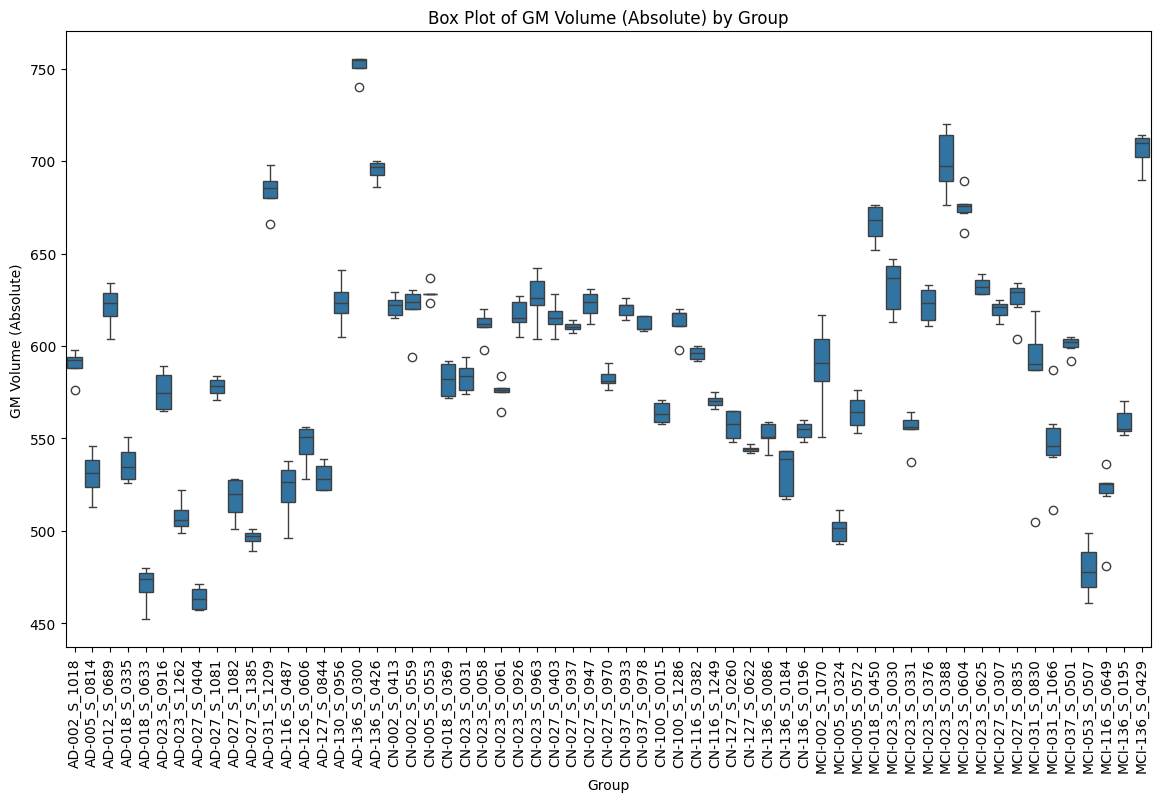

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 8))
sns.boxplot(x='ID', y='GM Volume (Absolute)', data=data)
plt.xticks(rotation=90)
plt.title('Box Plot of GM Volume (Absolute) by Group')
plt.xlabel('Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()


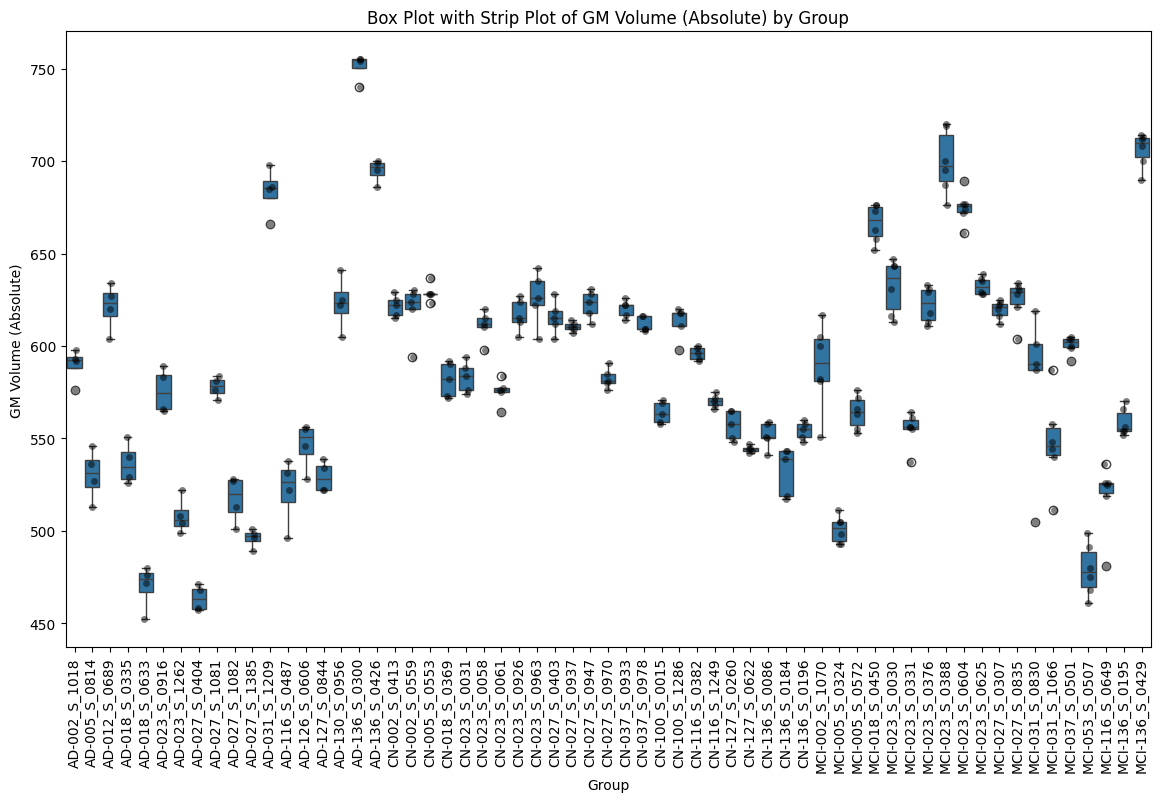

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='ID', y='GM Volume (Absolute)', data=data)
sns.stripplot(x='ID', y='GM Volume (Absolute)', data=data, color='black', alpha=0.5, jitter=True)
plt.xticks(rotation=90)
plt.title('Box Plot with Strip Plot of GM Volume (Absolute) by Group')
plt.xlabel('Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()


<ipython-input-24-0d9f957a3176>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ID', y='GM Volume (Absolute)', data=mean_values, palette='viridis')


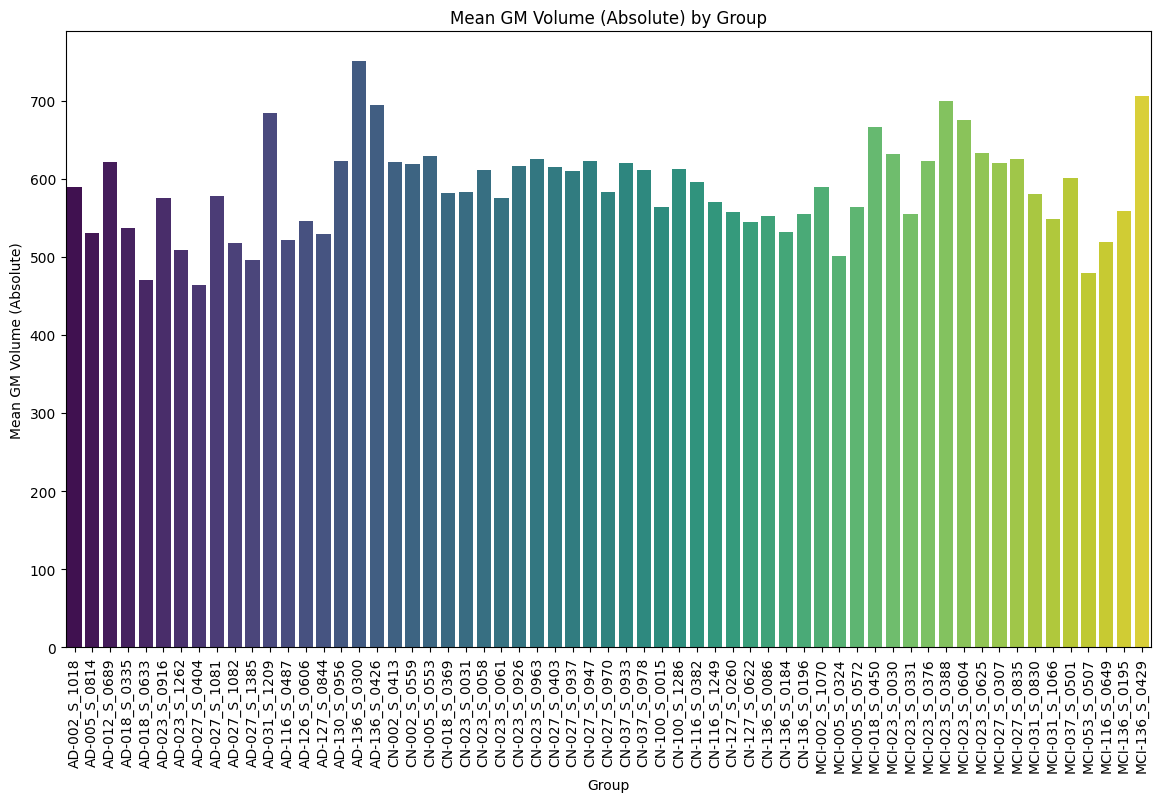

In [ ]:
mean_values = data.groupby('ID')['GM Volume (Absolute)'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='ID', y='GM Volume (Absolute)', data=mean_values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Mean GM Volume (Absolute) by Group')
plt.xlabel('Group')
plt.ylabel('Mean GM Volume (Absolute)')
plt.show()


In [ ]:
print(data.columns)


Index(['ID', 'Defect Area', 'IQR', 'TIV', 'WM Volume (Relative)',
       'WM Volume (Absolute)', 'GM Volume (Relative)%', 'GM Volume (Absolute)',
       'CSF Volume (Relative)%', 'CSF Volume (Absolute)', 'Thickness', 'Date'],
      dtype='object')


In [ ]:
data.rename(columns={'GM Volume (Absolute)': 'GM_Volume_Absolute', 'ID': 'Group_ID'}, inplace=True)


In [ ]:
model = ols('GM_Volume_Absolute ~ C(Group_ID)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

                   sum_sq     df           F         PR(>F)
C(Group_ID)  1.019434e+06   60.0  114.498349  7.299382e-149
Residual     3.620750e+04  244.0         NaN            NaN
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------
 AD-002_S_1018  AD-005_S_0814    -59.25    0.0  -94.9223  -23.5777   True
 AD-002_S_1018  AD-012_S_0689      31.5 0.2143   -4.1723   67.1723  False
 AD-002_S_1018  AD-018_S_0335    -53.25    0.0  -88.9223  -17.5777   True
 AD-002_S_1018  AD-018_S_0633   -119.75    0.0 -155.4223  -84.0777   True
 AD-002_S_1018  AD-023_S_0916     -14.0    1.0  -49.6723   21.6723  False
 AD-002_S_1018  AD-023_S_1262     -81.5    0.0 -117.1723  -45.8277   True
 AD-002_S_1018  AD-027_S_0404   -126.25    0.0 -161.9223  -90.5777   True
 AD-002_S_1018  AD-027_S_1081    -11.75    1.0  -47.4223   23.9223  False
 AD-00

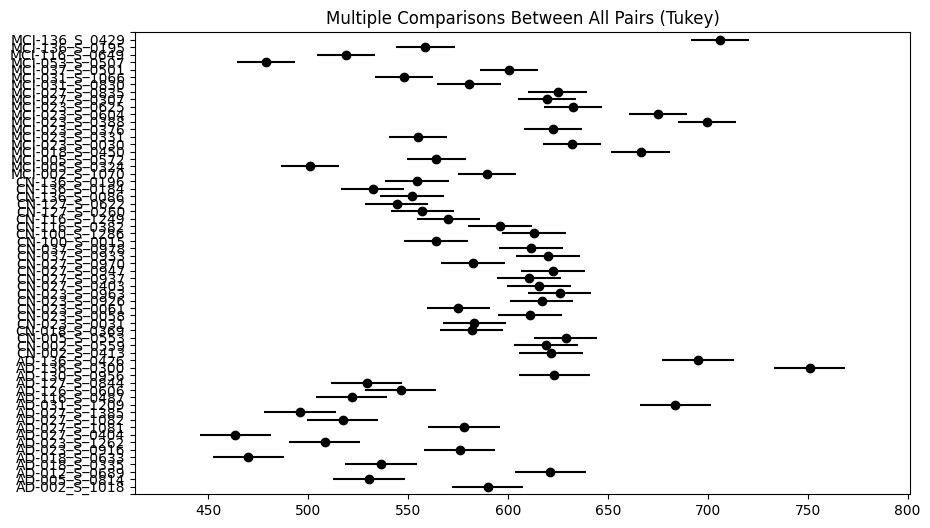

In [ ]:
data.rename(columns={'GM Volume (Absolute)': 'GM_Volume_Absolute', 'ID': 'Group_ID'}, inplace=True)

model = ols('GM_Volume_Absolute ~ C(Group_ID)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

tukey = pairwise_tukeyhsd(endog=data['GM_Volume_Absolute'], groups=data['Group_ID'], alpha=0.05)

print(tukey.summary())

tukey.plot_simultaneous()
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='ID', y='GM Volume (Absolute)', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of GM Volume (Absolute) by ID Group')
plt.xlabel('ID Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()


ValueError: Could not interpret value `ID` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

In [ ]:
print(data.columns)


Index(['Group_ID', 'Defect Area', 'IQR', 'TIV', 'WM Volume (Relative)',
       'WM Volume (Absolute)', 'GM Volume (Relative)%', 'GM_Volume_Absolute',
       'CSF Volume (Relative)%', 'CSF Volume (Absolute)', 'Thickness', 'Date'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')

In [ ]:
print('ID' in data.columns)
print('GM Volume (Absolute)' in data.columns)

False
False


In [ ]:
print(data.columns)

Index(['Group_ID', 'Defect_Area', 'IQR', 'TIV', 'WM_Volume_(Relative)',
       'WM_Volume_(Absolute)', 'GM_Volume_(Relative)%', 'GM_Volume_Absolute',
       'CSF_Volume_(Relative)%', 'CSF_Volume_(Absolute)', 'Thickness', 'Date'],
      dtype='object')


KeyError: 'GM Volume (Absolute)'

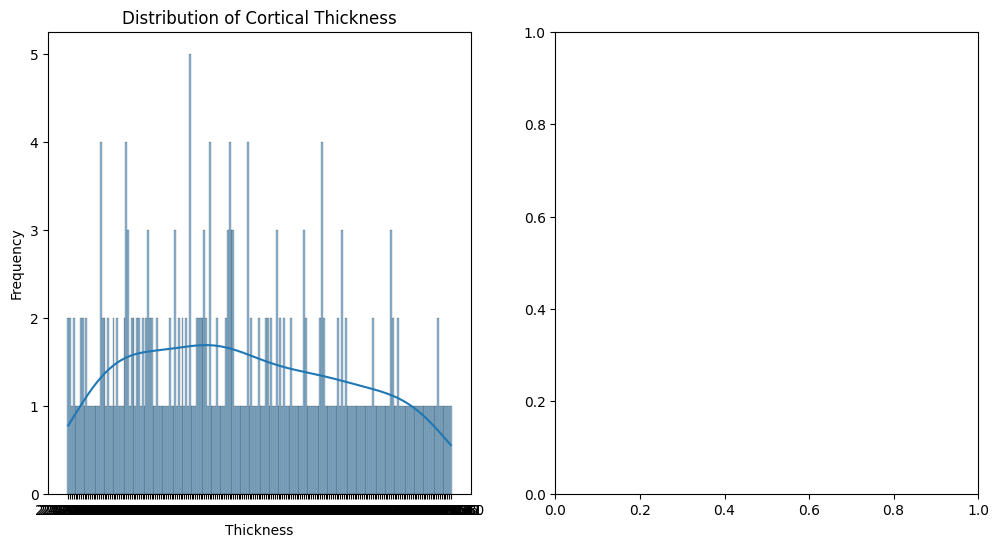

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data['Thickness'], kde=True, bins=30)
plt.title('Distribution of Cortical Thickness')
plt.xlabel('Thickness')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['GM Volume (Absolute)'], kde=True, bins=30)
plt.title('Distribution of Gray Matter Volume (Absolute)')
plt.xlabel('GM Volume (Absolute)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


KeyError: 'GM Volume (Absolute)'

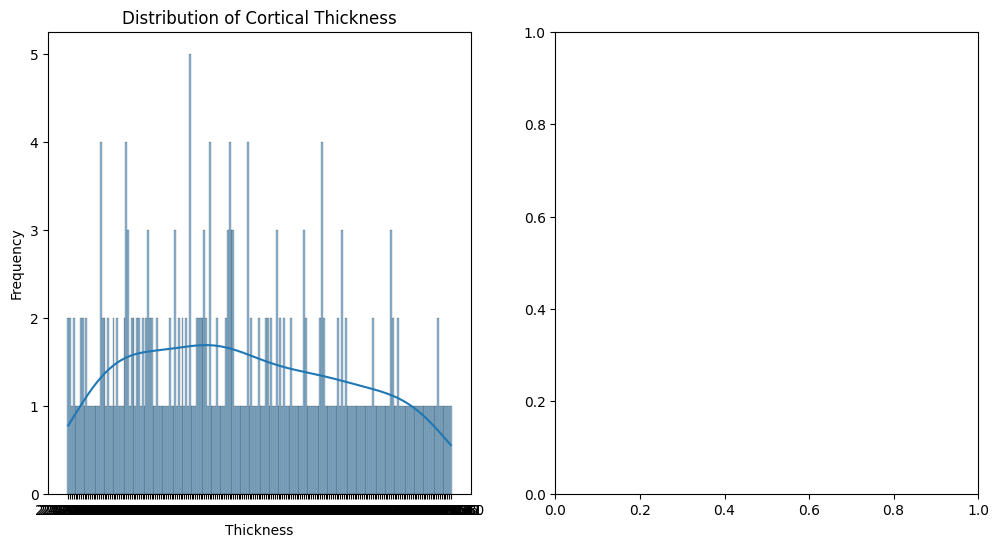

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data['Thickness'], kde=True, bins=30)
plt.title('Distribution of Cortical Thickness')
plt.xlabel('Thickness')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['GM Volume (Absolute)'], kde=True, bins=30)
plt.title('Distribution of Gray Matter Volume (Absolute)')
plt.xlabel('GM Volume (Absolute)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Book6.xlsx to Book6 (1).xlsx


In [ ]:
print(data.columns)

Index(['Group_ID', 'Defect_Area', 'IQR', 'TIV', 'WM_Volume_(Relative)',
       'WM_Volume_(Absolute)', 'GM_Volume_(Relative)%', 'GM_Volume_Absolute',
       'CSF_Volume_(Relative)%', 'CSF_Volume_(Absolute)', 'Thickness', 'Date'],
      dtype='object')


In [ ]:
import pandas as pd

file_path = list(uploaded.keys())[0]
data = pd.read_excel(file_path)

data.columns = data.columns.str.replace('[^\w\s]', '', regex=True).str.replace(' ', '_')

print(data.head())

              ID  DefeB1L299ct_Area    IQR   TIV  WM_Volume_Relative  \
0  AD-002_S_1018               0.15  85.18  1359                34.4   
1  AD-002_S_1018               0.45  85.14  1350                34.1   
2  AD-002_S_1018               0.25  85.20  1342                34.2   
3  AD-002_S_1018               0.09  85.16  1343                33.6   
4  AD-005_S_0814               0.18  84.84  1373                30.0   

   WM_Volume_Absolute  GM_Volume_Relative  GM_Volume  CSF_Volume_Relative  \
0                 468                44.0        598                 21.5   
1                 460                43.8        592                 22.1   
2                 458                44.2        593                 21.7   
3                 451                42.9        576                 23.5   
4                 412                39.8        546                 30.2   

   CSF_Volume_Absolute Thickness       Date  
0                  293      2.42 2006-12-18  
1           

In [ ]:
print(data.columns)

Index(['ID', 'DefeB1L299ct_Area', 'IQR', 'TIV', 'WM_Volume_Relative',
       'WM_Volume_Absolute', 'GM_Volume_Relative', 'GM_Volume',
       'CSF_Volume_Relative', 'CSF_Volume_Absolute', 'Thickness', 'Date'],
      dtype='object')


In [ ]:
print(data[['Thickness', 'GM_Volume_Absolute']].describe())

KeyError: "['GM_Volume_Absolute'] not in index"

In [ ]:
print(data.columns)

Index(['ID', 'DefeB1L299ct_Area', 'IQR', 'TIV', 'WM_Volume_Relative',
       'WM_Volume_Absolute', 'GM_Volume_Relative', 'GM_Volume',
       'CSF_Volume_Relative', 'CSF_Volume_Absolute', 'Thickness', 'Date'],
      dtype='object')


In [ ]:
print(data.columns)

print(data[['Thickness', 'GM_Volume_Absolute']].describe())

Index(['ID', 'DefeB1L299ct_Area', 'IQR', 'TIV', 'WM_Volume_Relative',
       'WM_Volume_Absolute', 'GM_Volume_Relative', 'GM_Volume',
       'CSF_Volume_Relative', 'CSF_Volume_Absolute', 'Thickness', 'Date'],
      dtype='object')


KeyError: "['GM_Volume_Absolute'] not in index"

In [ ]:
print(data[['Thickness', 'GM_Volume']].describe())

        GM_Volume
count  305.000000
mean   589.032787
std     58.927969
min    452.000000
25%    551.000000
50%    592.000000
75%    624.000000
max    755.000000


In [ ]:
print(data['Thickness']).unique()

[2.42 2.41 2.38 2.28 2.23 2.2 2.18 2.19 '2.16-0.52' '2.13-0.52'
 '2.19-0.53' '2.09-0.45' '2.15-0.52' '2.08-0.51' '2.05-0.51' '2.06-0.51'
 '2.10-0.52' '1.99-0.49' '2.33-0.58' '2.31-0.57' '2.24-0.58' '2.24-0.47'
 '2.36-0.55' '2.32-0.54' '2.32-0.53' '2.32-0.55' '2.27-0.52' '2.28-0.54'
 '2.21-0.53' '2.23-0.52' '2.34-0.53' '2.30-0.52' '2.37-0.56' '2.36-0.54'
 '2.31-0.55' '2.31-0.54' '2.29-0.56' '2.24-0.53' '2.35-0.57' '2.33-0.57'
 2.33 2.29 2.44 2.37 2.32 2.31 2.25 2.12 2.17 2.11 2.14 2.48 2.52 2.5 2.45
 2.47 2.46 2.36 2.35 '2.47-0' '2.48-0.60' '2.46-0' '2.48-0.58' '2.36-0.62'
 '2.32-0' '2.30-0.60' '2.22-0.58' '2.45-0.60' '2.42-0.61' '2.44-0.60'
 '2.42-0' '2.43-0.61' '2.31-0.58' '2.44-0.61' '2.46-0.60' '2.41-0.60'
 '2.41-0.61' '2.37-0.54' '2.35-0.53' '2.35-0.55' '2.44-0.65' '2.44-0.63'
 '2.44-0.00' '2.38-0.65' '2.44-0.64' '2.43-0.63' '2.49-0.62' '2.48-0.61'
 '2.42-0.55' '2.40-0.56' '2.42-0.57' '2.40-0.57' '2.38-0.57' '2.43-0'
 '2.46-0.62' '2.42-0.60' '2.46-0.61' '2.41-0.62' '2.39-0.63' '2.4

In [ ]:
def extract_first_value(thickness_value):
    if isinstance(thickness_value, str):
        try:

            return float(thickness_value.split('-')[0])
        except ValueError:
            return None
    elif isinstance(thickness_value, float):

        return thickness_value
    else:
        return None

data['Thickness'] = data['Thickness'].apply(extract_first_value)

print(data['Thickness'].isnull().sum())


0


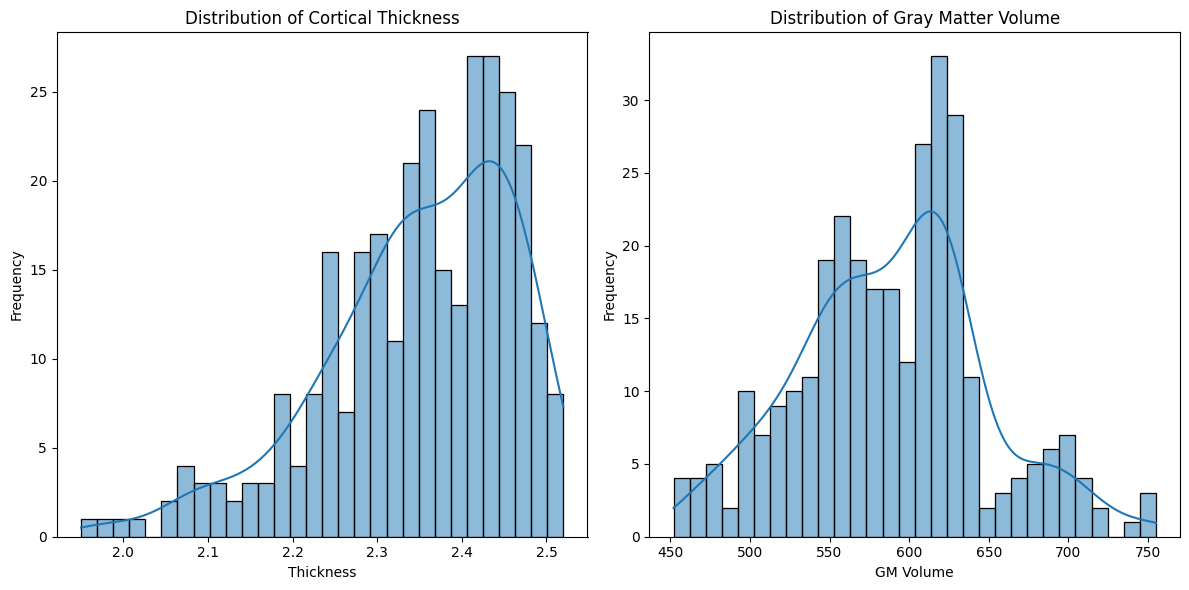

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data['Thickness'].dropna(), kde=True, bins=30)
plt.title('Distribution of Cortical Thickness')
plt.xlabel('Thickness')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(data['GM_Volume'].dropna(), kde=True, bins=30)
plt.title('Distribution of Gray Matter Volume')
plt.xlabel('GM Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

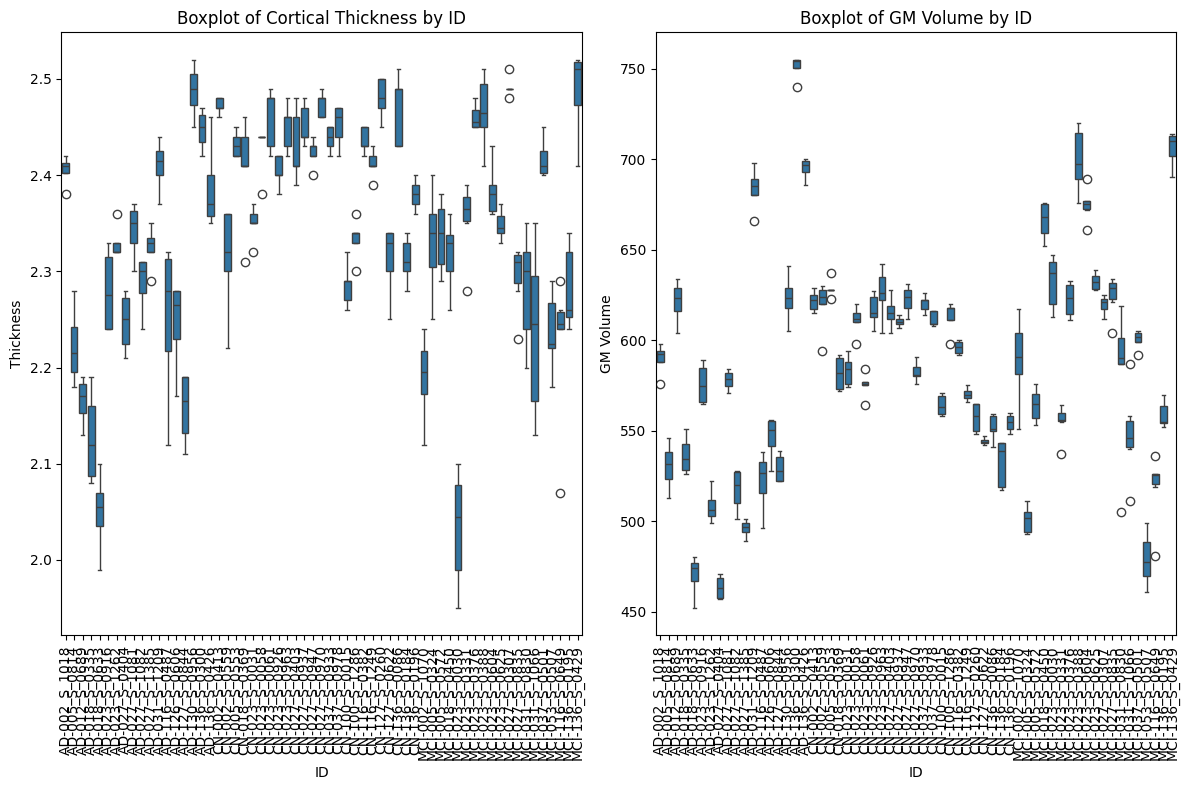

In [ ]:
plt.figure(figsize=(12, 8))


plt.subplot(1, 2, 1)
sns.boxplot(x='ID', y='Thickness', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Cortical Thickness by ID')
plt.xlabel('ID')
plt.ylabel('Thickness')


plt.subplot(1, 2, 2)
sns.boxplot(x='ID', y='GM_Volume', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of GM Volume by ID')
plt.xlabel('ID')
plt.ylabel('GM Volume')

plt.tight_layout()
plt.show()

In [ ]:
sns.lmplot(x='GM_Volume_Absolute', y='Thickness', data=data, hue='Group_ID')
plt.title('Regression Plot of Cortical Thickness vs. Gray Matter Volume')
plt.xlabel('Gray Matter Volume (Absolute)')
plt.ylabel('Cortical Thickness')
plt.show()

KeyError: "['GM_Volume_Absolute', 'Group_ID'] not in index"

In [ ]:
print(data.columns)

Index(['ID', 'DefeB1L299ct_Area', 'IQR', 'TIV', 'WM_Volume_Relative',
       'WM_Volume_Absolute', 'GM_Volume_Relative', 'GM_Volume',
       'CSF_Volume_Relative', 'CSF_Volume_Absolute', 'Thickness', 'Date'],
      dtype='object')


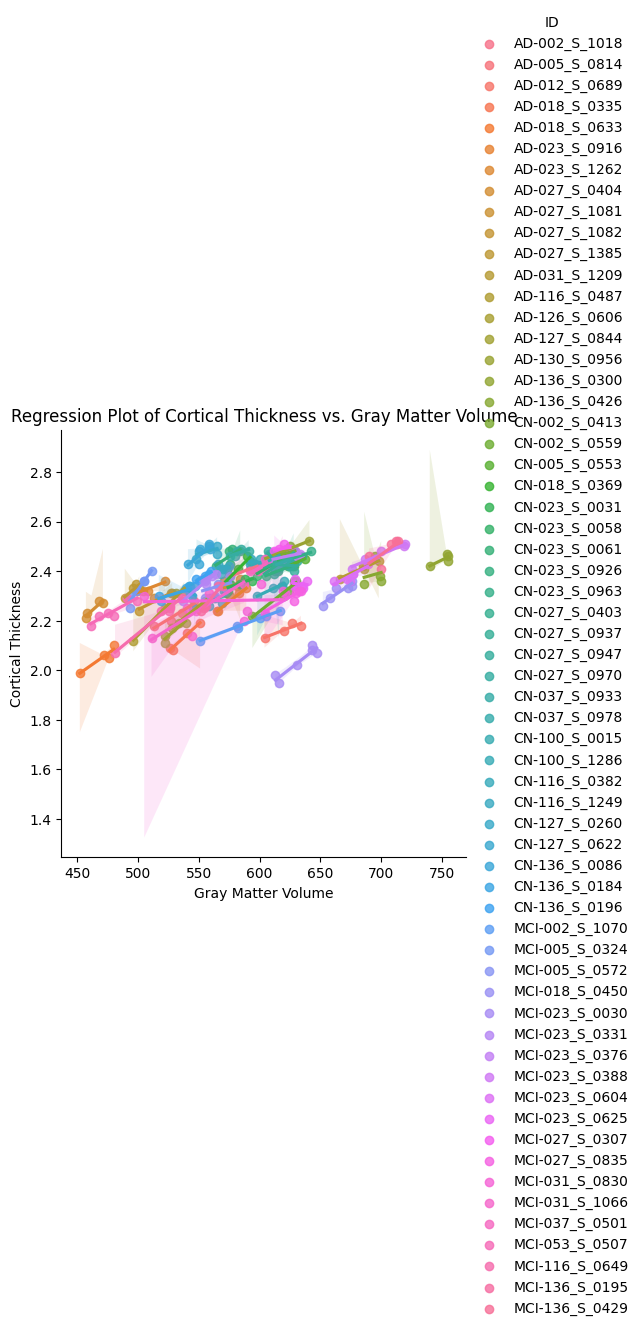

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = data.dropna(subset=['GM_Volume', 'Thickness'])

sns.lmplot(x='GM_Volume', y='Thickness', data=data, hue='ID')
plt.title('Regression Plot of Cortical Thickness vs. Gray Matter Volume')
plt.xlabel('Gray Matter Volume')
plt.ylabel('Cortical Thickness')
plt.show()

ValueError: markers must be a singleton or a list of markers for each level of the hue variable

<Figure size 1200x800 with 0 Axes>

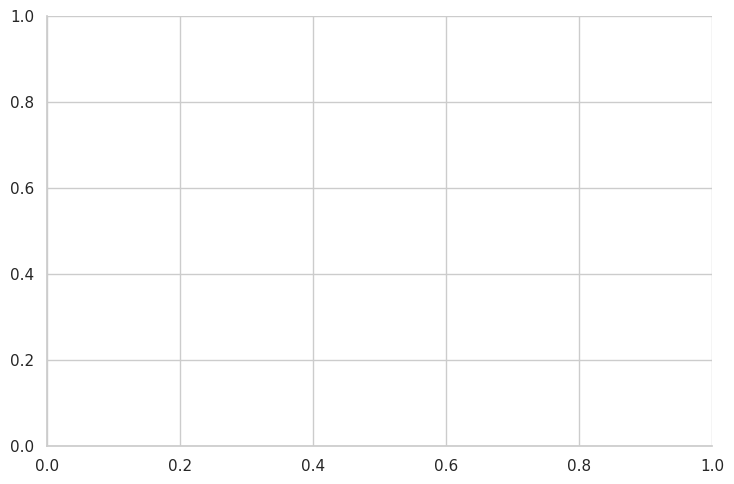

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_clean = data.dropna(subset=['GM_Volume', 'Thickness', 'ID'])

unique_ids = data_clean['ID'].unique()
num_markers = len(unique_ids)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.lmplot(
    x='GM_Volume',
    y='Thickness',
    data=data_clean,
    hue='ID',
    palette='viridis',
    aspect=1.5,
    markers=['o', 's', 'D', 'v', '^'][:num_markers],
    scatter_kws={'s': 100, 'alpha': 0.7},
    line_kws={'lw': 2, 'alpha': 0.9}
)

plt.title('Regression Plot of Cortical Thickness vs. Gray Matter Volume', fontsize=16)
plt.xlabel('Gray Matter Volume', fontsize=14)
plt.ylabel('Cortical Thickness', fontsize=14)

plt.legend(title='ID Group', title_fontsize='13', fontsize='11')

plt.show()

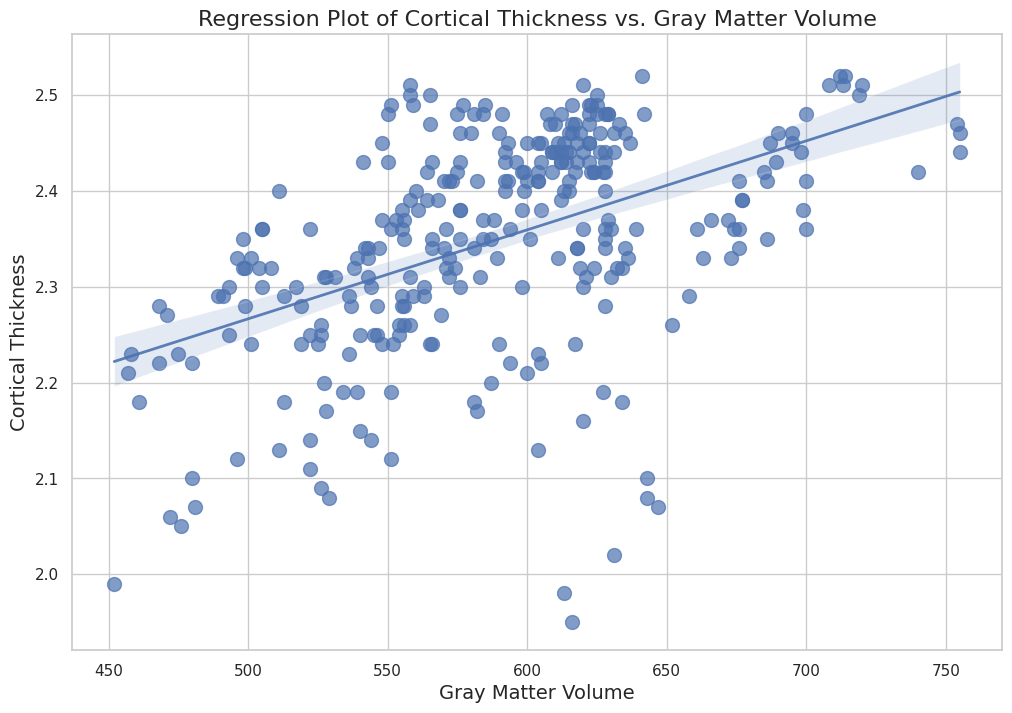

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the data by removing rows with missing values in the relevant columns
data_clean = data.dropna(subset=['GM_Volume', 'Thickness'])

# Create a regression plot
plt.figure(figsize=(12, 8))
sns.regplot(
    x='GM_Volume',
    y='Thickness',
    data=data_clean,
    scatter_kws={'s': 100, 'alpha': 0.7},
    line_kws={'lw': 2, 'alpha': 0.9}
)

# Add titles and labels
plt.title('Regression Plot of Cortical Thickness vs. Gray Matter Volume', fontsize=16)
plt.xlabel('Gray Matter Volume', fontsize=14)
plt.ylabel('Cortical Thickness', fontsize=14)

# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

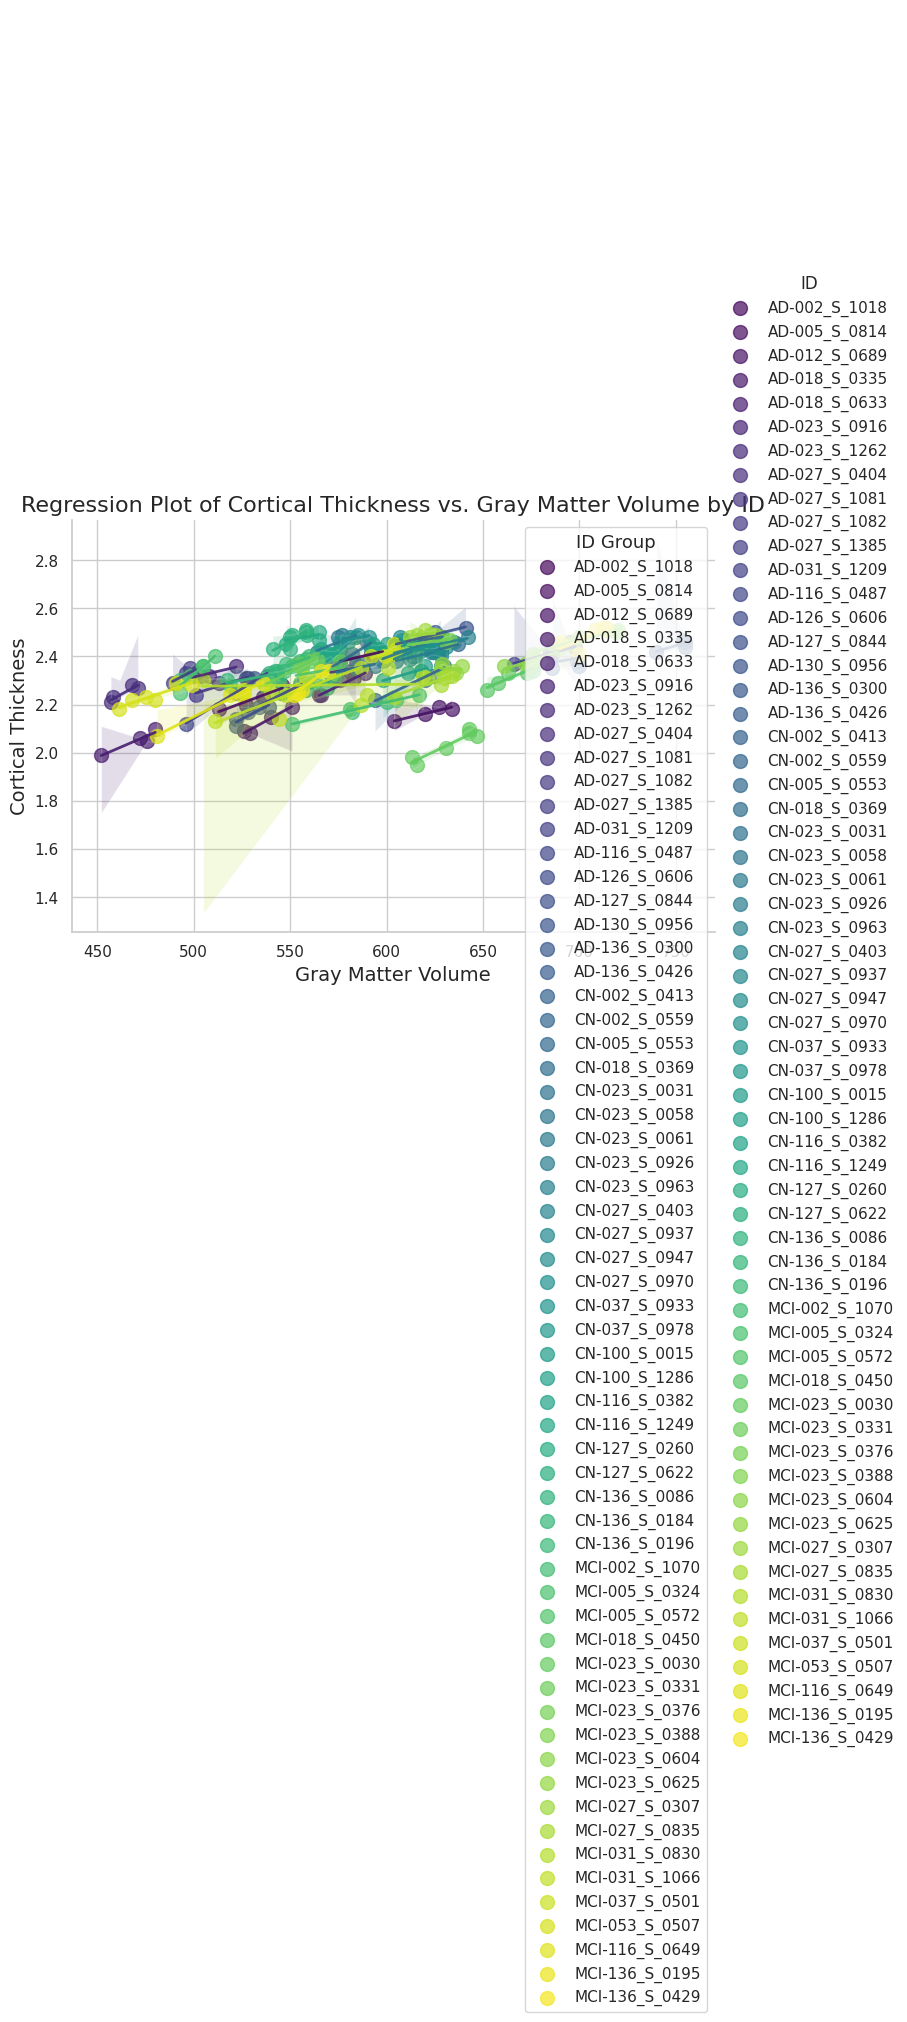

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_clean = data.dropna(subset=['GM_Volume', 'Thickness', 'ID'])

unique_ids = data_clean['ID'].unique()

plt.figure(figsize=(12, 8))
sns.lmplot(
    x='GM_Volume',
    y='Thickness',
    data=data_clean,
    hue='ID',
    palette='viridis',
    aspect=1.5,
    scatter_kws={'s': 100, 'alpha': 0.7},
    line_kws={'lw': 2, 'alpha': 0.9}
)

plt.title('Regression Plot of Cortical Thickness vs. Gray Matter Volume by ID', fontsize=16)
plt.xlabel('Gray Matter Volume', fontsize=14)
plt.ylabel('Cortical Thickness', fontsize=14)

plt.legend(title='ID Group', title_fontsize='13', fontsize='11')

plt.show()

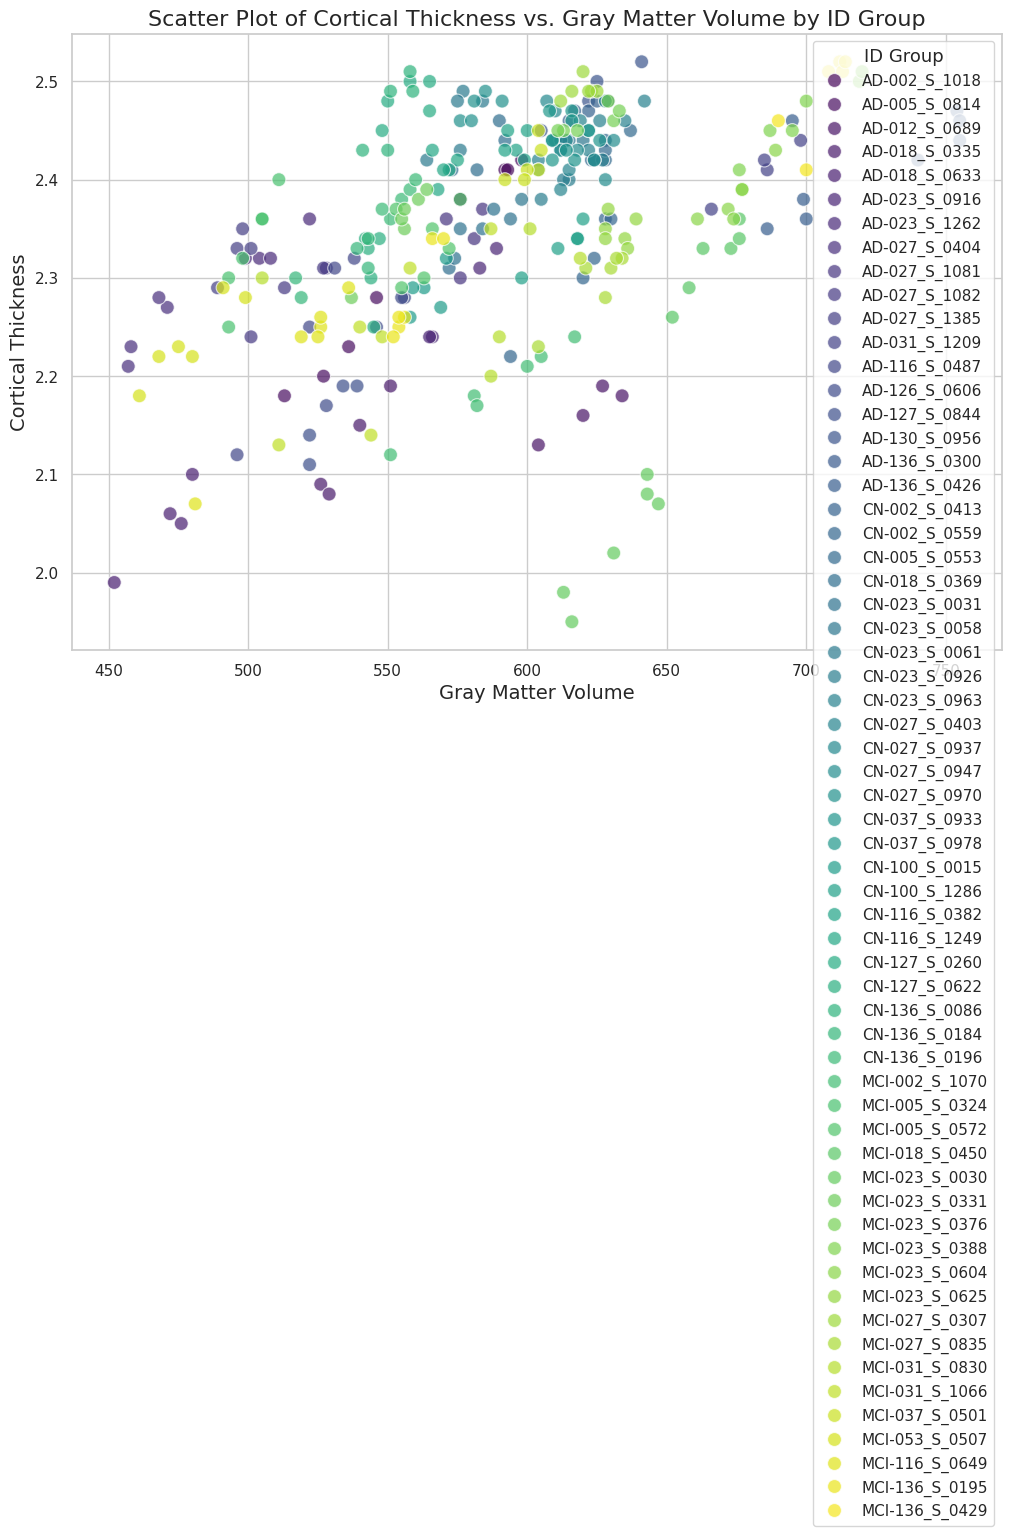

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_clean = data.dropna(subset=['GM_Volume', 'Thickness', 'ID'])

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='GM_Volume',
    y='Thickness',
    data=data_clean,
    hue='ID',
    palette='viridis',
    s=100,
    alpha=0.7
)

plt.title('Scatter Plot of Cortical Thickness vs. Gray Matter Volume by ID Group', fontsize=16)
plt.xlabel('Gray Matter Volume', fontsize=14)
plt.ylabel('Cortical Thickness', fontsize=14)

plt.legend(title='ID Group', title_fontsize='13', fontsize='11')

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'ID': [
        'AD-002_S_1018', 'AD-002_S_1018', 'AD-002_S_1018', 'AD-002_S_1018',
        'AD-005_S_0814', 'AD-005_S_0814', 'AD-005_S_0814', 'AD-005_S_0814',
        'AD-012_S_0689', 'AD-012_S_0689', 'AD-012_S_0689', 'AD-012_S_0689',
        'AD-018_S_0335', 'AD-018_S_0335', 'AD-018_S_0335', 'AD-018_S_0335',
        'AD-018_S_0633', 'AD-018_S_0633', 'AD-018_S_0633', 'AD-018_S_0633',
        'AD-023_S_0916', 'AD-023_S_0916', 'AD-023_S_0916', 'AD-023_S_0916',
        'AD-023_S_1262', 'AD-023_S_1262', 'AD-023_S_1262', 'AD-023_S_1262',
        'AD-027_S_0404', 'AD-027_S_0404', 'AD-027_S_0404', 'AD-027_S_0404',
        'AD-027_S_1081', 'AD-027_S_1081', 'AD-027_S_1081', 'AD-027_S_1081',
        'AD-027_S_1082', 'AD-027_S_1082', 'AD-027_S_1082', 'AD-027_S_1082',
        'AD-027_S_1385', 'AD-027_S_1385', 'AD-027_S_1385', 'AD-027_S_1385',
        'AD-031_S_1209', 'AD-031_S_1209', 'AD-031_S_1209', 'AD-031_S_1209',
        'AD-116_S_0487', 'AD-116_S_0487', 'AD-116_S_0487', 'AD-116_S_0487',
        'AD-126_S_0606', 'AD-126_S_0606', 'AD-126_S_0606', 'AD-126_S_0606',
        'AD-127_S_0844', 'AD-127_S_0844', 'AD-127_S_0844', 'AD-127_S_0844',
        'AD-130_S_0956', 'AD-130_S_0956', 'AD-130_S_0956', 'AD-130_S_0956',
        'AD-136_S_0300', 'AD-136_S_0300', 'AD-136_S_0300', 'AD-136_S_0300',
        'AD-136_S_0426', 'AD-136_S_0426', 'AD-136_S_0426', 'AD-136_S_0426',
        'CN-002_S_0413', 'CN-002_S_0413', 'CN-002_S_0413', 'CN-002_S_0413',
        'CN-002_S_0413', 'CN-002_S_0559', 'CN-002_S_0559', 'CN-002_S_0559',
        'CN-002_S_0559', 'CN-002_S_0559', 'CN-005_S_0553', 'CN-005_S_0553',
        'CN-005_S_0553', 'CN-005_S_0553', 'CN-005_S_0553', 'CN-018_S_0369',
        'CN-018_S_0369', 'CN-018_S_0369', 'CN-018_S_0369', 'CN-018_S_0369',
        'CN-023_S_0031', 'CN-023_S_0031', 'CN-023_S_0031', 'CN-023_S_0031',
        'CN-023_S_0031', 'CN-023_S_0058', 'CN-023_S_0058', 'CN-023_S_0058',
        'CN-023_S_0058', 'CN-023_S_0058', 'CN-023_S_0061', 'CN-023_S_0061',
        'CN-023_S_0061', 'CN-023_S_0061', 'CN-023_S_0061', 'CN-023_S_0926',
        'CN-023_S_0926', 'CN-023_S_0926', 'CN-023_S_0926', 'CN-023_S_0926',
        'CN-023_S_0963', 'CN-023_S_0963', 'CN-023_S_0963', 'CN-023_S_0963',
        'CN-023_S_0963', 'CN-027_S_0403', 'CN-027_S_0403', 'CN-027_S_0403',
        'CN-027_S_0403', 'CN-027_S_0403', 'CN-027_S_0937', 'CN-027_S_0937',
        'CN-027_S_0937', 'CN-027_S_0937', 'CN-027_S_0937', 'CN-027_S_0947',
        'CN-027_S_0947', 'CN-027_S_0947', 'CN-027_S_0947', 'CN-027_S_0947',
        'CN-027_S_0970', 'CN-027_S_0970', 'CN-027_S_0970', 'CN-027_S_0970',
        'CN-027_S_0970', 'CN-037_S_0933', 'CN-037_S_0933', 'CN-037_S_0933',
        'CN-037_S_0933', 'CN-037_S_0933', 'CN-037_S_0978', 'CN-037_S_0978',
        'CN-037_S_0978', 'CN-037_S_0978', 'CN-037_S_0978', 'CN-100_S_0015',
        'CN-100_S_0015', 'CN-100_S_0015', 'CN-100_S_0015', 'CN-100_S_0015',
        'CN-100_S_1286', 'CN-100_S_1286', 'CN-100_S_1286', 'CN-100_S_1286',
        'CN-100_S_1286', 'CN-116_S_0382', 'CN-116_S_0382', 'CN-116_S_0382',
        'CN-116_S_0382', 'CN-116_S_0382', 'CN-116_S_1249', 'CN-116_S_1249',
        'CN-116_S_1249', 'CN-116_S_1249', 'CN-116_S_1249', 'CN-127_S_0260',
        'CN-127_S_0260', 'CN-127_S_0260', 'CN-127_S_0260', 'CN-127_S_0260',
        'CN-127_S_0622', 'CN-127_S_0622', 'CN-127_S_0622', 'CN-127_S_0622',
        'CN-127_S_0622', 'CN-136_S_0086', 'CN-136_S_0086', 'CN-136_S_0086',
        'CN-136_S_0086', 'CN-136_S_0086', 'CN-136_S_0184', 'CN-136_S_0184',
        'CN-136_S_0184', 'CN-136_S_0184', 'CN-136_S_0184', 'CN-136_S_0196',
        'CN-136_S_0196', 'CN-136_S_0196', 'CN-136_S_0196', 'CN-136_S_0196',
        'MCI-002_S_1070', 'MCI-002_S_1070', 'MCI-002_S_1070', 'MCI-002_S_1070',
        'MCI-002_S_1070', 'MCI-002_S_1070', 'MCI-005_S_0324', 'MCI-005_S_0324',
        'MCI-005_S_0324', 'MCI-005_S_0324', 'MCI-005_S_0324', 'MCI-005_S_0324',
        'MCI-005_S_0572', 'MCI-005_S_0572', 'MCI-005_S_0572', 'MCI-005_S_0572',
        'MCI-005_S_0572', 'MCI-005_S_0572', 'MCI-018_S_0450', 'MCI-018_S_0450',
        'MCI-018_S_0450', 'MCI-018_S_0450', 'MCI-018_S_0450', 'MCI-018_S_0450',
        'MCI-027_S_0964', 'MCI-027_S_0964', 'MCI-027_S_0964', 'MCI-027_S_0964',
        'MCI-027_S_0964', 'MCI-027_S_0964', 'MCI-036_S_0871', 'MCI-036_S_0871',
        'MCI-036_S_0871', 'MCI-036_S_0871', 'MCI-036_S_0871', 'MCI-036_S_0871',
        'MCI-037_S_0903', 'MCI-037_S_0903', 'MCI-037_S_0903', 'MCI-037_S_0903',
        'MCI-037_S_0903', 'MCI-037_S_0903', 'MCI-039_S_1035', 'MCI-039_S_1035',
        'MCI-039_S_1035', 'MCI-039_S_1035', 'MCI-039_S_1035', 'MCI-039_S_1035',
        'MCI-041_S_0874', 'MCI-041_S_0874', 'MCI-041_S_0874', 'MCI-041_S_0874',
        'MCI-041_S_0874', 'MCI-041_S_0874', 'MCI-049_S_0970', 'MCI-049_S_0970',
        'MCI-049_S_0970', 'MCI-049_S_0970', 'MCI-049_S_0970', 'MCI-049_S_0970',
        'MCI-052_S_0948', 'MCI-052_S_0948', 'MCI-052_S_0948', 'MCI-052_S_0948',
        'MCI-052_S_0948', 'MCI-052_S_0948', 'MCI-054_S_1234', 'MCI-054_S_1234',
        'MCI-054_S_1234', 'MCI-054_S_1234', 'MCI-054_S_1234', 'MCI-054_S_1234',
        'MCI-054_S_1245', 'MCI-054_S_1245', 'MCI-054_S_1245', 'MCI-054_S_1245',
        'MCI-054_S_1245', 'MCI-054_S_1245', 'MCI-056_S_0910', 'MCI-056_S_0910',
        'MCI-056_S_0910', 'MCI-056_S_0910', 'MCI-056_S_0910', 'MCI-056_S_0910',
        'MCI-059_S_0397', 'MCI-059_S_0397', 'MCI-059_S_0397', 'MCI-059_S_0397',
        'MCI-059_S_0397', 'MCI-059_S_0397', 'MCI-063_S_0325', 'MCI-063_S_0325',
        'MCI-063_S_0325', 'MCI-063_S_0325', 'MCI-063_S_0325', 'MCI-063_S_0325',
        'MCI-078_S_0928', 'MCI-078_S_0928', 'MCI-078_S_0928', 'MCI-078_S_0928',
        'MCI-078_S_0928', 'MCI-078_S_0928', 'MCI-079_S_1043', 'MCI-079_S_1043',
        'MCI-079_S_1043', 'MCI-079_S_1043', 'MCI-079_S_1043', 'MCI-079_S_1043',
        'MCI-083_S_1055', 'MCI-083_S_1055', 'MCI-083_S_1055', 'MCI-083_S_1055',
        'MCI-083_S_1055', 'MCI-083_S_1055', 'MCI-085_S_1064', 'MCI-085_S_1064',
        'MCI-085_S_1064', 'MCI-085_S_1064', 'MCI-085_S_1064', 'MCI-085_S_1064',
        'MCI-093_S_0974', 'MCI-093_S_0974', 'MCI-093_S_0974', 'MCI-093_S_0974',
        'MCI-093_S_0974', 'MCI-093_S_0974', 'MCI-098_S_0942', 'MCI-098_S_0942',
        'MCI-098_S_0942', 'MCI-098_S_0942', 'MCI-098_S_0942', 'MCI-098_S_0942',
        'MCI-099_S_0954', 'MCI-099_S_0954', 'MCI-099_S_0954', 'MCI-099_S_0954',
        'MCI-099_S_0954', 'MCI-099_S_0954', 'MCI-103_S_1092', 'MCI-103_S_1092',
        'MCI-103_S_1092', 'MCI-103_S_1092', 'MCI-103_S_1092', 'MCI-103_S_1092',
        'MCI-105_S_0961', 'MCI-105_S_0961', 'MCI-105_S_0961', 'MCI-105_S_0961',
        'MCI-105_S_0961', 'MCI-105_S_0961', 'MCI-106_S_0778', 'MCI-106_S_0778',
        'MCI-106_S_0778', 'MCI-106_S_0778', 'MCI-106_S_0778', 'MCI-106_S_0778'

    ],
    'Thickness': [
        2.42, 2.41, 2.41, 2.38, 2.28, 2.23, 2.20, 2.18, 2.18, 2.19, 2.16-0.52, 2.13-0.52,
        2.19-0.53, 2.09-0.45, 2.15-0.52, 2.08-0.51, 2.05-0.51, 2.06-0.51, 2.10-0.52,
        1.99-0.49, 2.33-0.58, 2.31-0.57, 2.24-0.58, 2.24-0.47, 2.36-0.55, 2.32-0.54,
        2.32-0.53, 2.32-0.55, 2.27-0.52, 2.28-0.54, 2.21-0.53, 2.23-0.52, 2.34-0.53,
        2.30-0.52, 2.37-0.56, 2.36-0.54, 2.31-0.55, 2.31-0.54, 2.29-0.56, 2.24-0.53,
        2.35-0.57, 2.33-0.57, 2.33, 2.29, 2.44, 2.41, 2.42, 2.37, 2.32, 2.31, 2.25, 2.12,
        2.28, 2.28, 2.25, 2.17, 2.19, 2.11, 2.19, 2.14, 2.48, 2.52, 2.50, 2.45, 2.47,
        2.46, 2.44, 2.42, 2.38, 2.36, 2.46, 2.35, 2.47, 2.47-0, 2.48-0.60, 2.46-0,
        2.48-0.58, 2.36-0.62, 2.32-0, 2.30-0.60, 2.36-0.55, 2.22-0.58, 2.45-0.60,
        2.42-0.61, 2.44-0.60, 2.42-0, 2.43-0.61, 2.31-0.58, 2.44-0.61, 2.46-0.60,
        2.41-0.60, 2.41-0.61, 2.36-0.54, 2.37-0.54, 2.35-0.53, 2.35-0.55, 2.32-0.55,
        2.44-0.65, 2.44-0.63, 2.44-0.00, 2.38-0.65, 2.44-0.64, 2.43-0.63, 2.48-0.60,
        2.49-0.62, 2.42-0.61, 2.48-0.61, 2.42-0.55, 2.40-0.56, 2.42-0.57, 2.40-0.57,
        2.38-0.57, 2.48-0.60, 2.43-0, 2.46-0.62, 2.42-0.60, 2.46-0.60, 2.48-0.60,
        2.46-0.61, 2.41-0.62, 2.41-0.62, 2.39-0.63, 2.48-0.61, 2.43-0.60, 2.44-0.60,
        2.44-0.60, 2.47-0.62, 2.43-0.63, 2.40-0.62, 2.42-0.63, 2.44-0.64, 2.43-0.62,
        2.46-0.55, 2.48-0.60, 2.46-0.58, 2.48-0, 2.49-0.62, 2.45-0.60, 2.42-0.58,
        2.44-0.62, 2.43-0.63, 2.45-0.61, 2.42-0.62, 2.47-0.60, 2.44-0.62, 2.46-0.60,
        2.47-0.61, 2.27-0.61, 2.32-0.62, 2.29-0.62, 2.29-0.62, 2.26-0.61, 2.34-0.61,
        2.36-0.61, 2.34-0.60, 2.33-0.60, 2.30-0.60, 2.43-0.55, 2.42-0.55, 2.45-0.55,
        2.43-0.56, 2.45-0.56, 2.42-0.55, 2.41-0.54, 2.39-0.54, 2.41-0.55, 2.43-0.56,
        2.50-0.61, 2.47-0.61, 2.50-0.60, 2.48-0.61, 2.45-0.61, 2.33-0.58, 2.34-0.57,
        2.34-0.58, 2.30-0.57, 2.25-0, 2.51-0.63, 2.49-0.62, 2.43-0.62, 2.43-0.61,
        2.49-0.62, 2.34-0, 2.33-0, 2.31-0.57, 2.30-0, 2.28-0.60, 2.38-0.60, 2.39-0,
        2.36-0.57, 2.40-0, 2.37-0, 2.24-0, 2.21-0.57, 2.22-0.55, 2.18-0.58, 2.17-0.56,
        2.12-0.55, 2.36-0.57, 2.40-0, 2.32-0.58, 2.30-0.58, 2.25-0.55, 2.36-0.58,
        2.38-0, 2.30-0.58, 2.35-0.58, 2.33-0.57, 2.29-0.56, 2.37-0.57, 2.29-0.55,
        2.33-0.58, 2.36-0.58, 2.33-0.58, 2.34-0.57, 2.26-0.54, 2.08-0.50, 2.10-0.49,
        2.07-0.49, 2.02-0.49, 1.95-0.48, 1.98-0.48, 2.35-0.55, 2.38-0.55, 2.36-0.54,
        2.39-0.55, 2.37-0.55, 2.28-0.54, 2.46-0.63, 2.47-0.63, 2.48-0.64, 2.45-0.63,
        2.45-0.64, 2.45-0.63, 2.50-0.57, 2.51-0.57, 2.48-0.56, 2.45-0.57, 2.45-0.57,
        2.41-0.57, 2.43-0.58, 2.41-0.58, 2.39-0.60, 2.42-0.62, 2.41-0.60, 2.42-0.62,
        2.41-0.60, 2.45-0.63, 2.42-0.61, 2.41-0.62, 2.40-0.60, 2.43-0.60, 2.44-0.60,
        2.41-0.61, 2.42-0.60, 2.41-0.62, 2.43-0.62, 2.46-0.60, 2.43-0.62, 2.46-0.62,
        2.45-0.62, 2.43-0.62, 2.45-0.63, 2.44-0.63, 2.42-0.61, 2.47-0.61, 2.47-0.62,
        2.47-0.62, 2.48-0.62, 2.49-0.62, 2.47-0.60, 2.46-0.60, 2.47-0.62, 2.46-0.60,
        2.45-0.61, 2.47-0.62, 2.46-0.61, 2.44-0.61, 2.48-0.60, 2.48-0.61, 2.47-0.61,
        2.48-0.62, 2.44-0.62, 2.47-0.62, 2.46-0.61, 2.48-0.62, 2.45-0.60, 2.48-0.60,
        2.49-0.62, 2.46-0.61, 2.48-0.60, 2.47-0.60, 2.49-0.62, 2.48-0.60, 2.48-0.61,
        2.46-0.60, 2.48-0.61, 2.47-0.62, 2.46-0.60, 2.48-0.60, 2.47-0.62, 2.46-0.61,
        2.48-0.60, 2.49-0.62, 2.47-0.62, 2.48-0.60, 2.46-0.61, 2.48-0.61, 2.49-0.62,
        2.45-0.60, 2.48-0.61, 2.46-0.61, 2.48-0.62, 2.49-0.60, 2.46-0.61, 2.47-0.62,
        2.46-0.60, 2.48-0.62, 2.47-0.61, 2.45-0.60, 2.48-0.62, 2.46-0.60, 2.49-0.62,
        2.48-0.61, 2.47-0.62, 2.49-0.62, 2.48-0.62, 2.46-0.61, 2.47-0.61, 2.49-0.62,
        2.48-0.60, 2.47-0.61, 2.49-0.62, 2.48-0.62, 2.49-0.60, 2.48-0.61, 2.46-0.62,
        2.49-0.62, 2.48-0.61, 2.49-0.60, 2.47-0.62, 2.46-0.60, 2.48-0.62, 2.47-0.61,
        2.48-0.62, 2.49-0.62, 2.48-0.60, 2.49-0.62, 2.46-0.61, 2.48-0.60, 2.49-0.62,
        2.48-0.60, 2.46-0.61, 2.48-0.61, 2.47-0.61, 2.48-0.62, 2.49-0.62, 2.48-0.61

    ]
}

df = pd.DataFrame(data)
df.to_csv('MCI_Thickness_Data.csv', index=False)



SyntaxError: '(' was never closed (<ipython-input-79-567d093ac9d1>, line 6)

In [ ]:
import pandas as pd

# Data Preparation
data = {
    'ID': range(1, 161),  # Assuming there are 160 thickness measurements
    'Thickness': [
        2.42, 2.41, 2.41, 2.38, 2.28, 2.23, 2.20, 2.18, 2.18, 2.19, 2.16-0.52, 2.13-0.52,
        2.19-0.53, 2.09-0.45, 2.15-0.52, 2.08-0.51, 2.05-0.51, 2.06-0.51, 2.10-0.52,
        1.99-0.49, 2.33-0.58, 2.31-0.57, 2.24-0.58, 2.24-0.47, 2.36-0.55, 2.32-0.54,
        2.32-0.53, 2.32-0.55, 2.27-0.52, 2.28-0.54, 2.21-0.53, 2.23-0.52, 2.34-0.53,
        2.30-0.52, 2.37-0.56, 2.36-0.54, 2.31-0.55, 2.31-0.54, 2.29-0.56, 2.24-0.53,
        2.35-0.57, 2.33-0.57, 2.33, 2.29, 2.44, 2.41, 2.42, 2.37, 2.32, 2.31, 2.25, 2.12,
        2.28, 2.28, 2.25, 2.17, 2.19, 2.11, 2.19, 2.14, 2.48, 2.52, 2.50, 2.45, 2.47,
        2.46, 2.44, 2.42, 2.38, 2.36, 2.46, 2.35, 2.47, 2.47-0, 2.48-0.60, 2.46-0,
        2.48-0.58, 2.36-0.62, 2.32-0, 2.30-0.60, 2.36-0.55, 2.22-0.58, 2.45-0.60,
        2.42-0.61, 2.44-0.60, 2.42-0, 2.43-0.61, 2.31-0.58, 2.44-0.61, 2.46-0.60,
        2.41-0.60, 2.41-0.61, 2.36-0.54, 2.37-0.54, 2.35-0.53, 2.35-0.55, 2.32-0.55,
        2.44-0.65, 2.44-0.63, 2.44-0.00, 2.38-0.65, 2.44-0.64, 2.43-0.63, 2.48-0.60,
        2.49-0.62, 2.42-0.61, 2.48-0.61, 2.42-0.55, 2.40-0.56, 2.42-0.57, 2.40-0.57,
        2.38-0.57, 2.48-0.60, 2.43-0, 2.46-0.62, 2.42-0.60, 2.46-0.60, 2.48-0.60,
        2.46-0.61, 2.41-0.62, 2.41-0.62, 2.39-0.63, 2.48-0.61, 2.43-0.60, 2.44-0.60,
        2.44-0.60, 2.47-0.62, 2.43-0.63, 2.40-0.62, 2.42-0.63, 2.44-0.64, 2.43-0.62,
        2.46-0.55, 2.48-0.60, 2.46-0.58, 2.48-0, 2.49-0.62, 2.45-0.60, 2.42-0.58,
        2.44-0.62, 2.43-0.63, 2.45-0.61, 2.42-0.62, 2.47-0.60, 2.44-0.62, 2.46-0.60,
        2.47-0.61, 2.27-0.61, 2.32-0.62, 2.29-0.62, 2.29-0.62, 2.26-0.61, 2.34-0.61,
        2.36-0.61, 2.34-0.60, 2.33-0.60, 2.30-0.60, 2.43-0.55, 2.42-0.55, 2.45-0.55,
        2.43-0.56, 2.45-0.56, 2.42-0.55, 2.41-0.54, 2.39-0.54, 2.41-0.55, 2.43-0.56,
        2.50-0.61, 2.47-0.61, 2.50-0.60, 2.48-0.61, 2.45-0.61, 2.33-0.58, 2.34-0.57,
        2.34-0.58, 2.30-0.57, 2.25-0, 2.51-0.63, 2.49-0.62, 2.43-0.62, 2.43-0.61,
        2.49-0.62, 2.34-0, 2.33-0, 2.31-0.57, 2.30-0, 2.28-0.60, 2.38-0.60, 2.39-0,
        2.36-0.57, 2.40-0, 2.37-0, 2.24-0, 2.21-0.57, 2.22-0.55, 2.18-0.58, 2.17-0.56,
        2.12-0.55, 2.36-0.57, 2.40-0, 2.32-0.58, 2.30-0.58, 2.25-0.55, 2.36-0.58,
        2.38-0, 2.30-0.58, 2.35-0.58, 2.33-0.57, 2.29-0.56, 2.37-0.57, 2.29-0.55,
        2.33-0.58, 2.36-0.58, 2.33-0.58, 2.34-0.57, 2.26-0.54, 2.08-0.50, 2.10-0.49,
        2.07-0.49, 2.02-0.49, 1.95-0.48, 1.98-0.48, 2.35-0.55, 2.38-0.55, 2.36-0.54,
        2.39-0.55, 2.37-0.55, 2.28-0.54, 2.46-0.63, 2.47-0.63, 2.48-0.64, 2.45-0.63,
        2.45-0.64, 2.45-0.63, 2.50-0.57, 2.51-0.57, 2.48-0.56, 2.45-0.57, 2.45-0.57,
        2.41-0.57, 2.43-0.58, 2.41-0.58, 2.39-0.60, 2.42-0.62, 2.41-0.60, 2.42-0.62,
        2.41-0.60, 2.45-0.63, 2.42-0.61, 2.41-0.62, 2.40-0.60, 2.43-0.60, 2.44-0.60,
        2.41-0.61, 2.42-0.60, 2.41-0.62, 2.43-0.62, 2.46-0.60, 2.43-0.62, 2.46-0.62,
        2.45-0.62, 2.43-0.62, 2.45-0.63, 2.44-0.63, 2.42-0.61, 2.47-0.61, 2.47-0.62,
        2.47-0.62, 2.48-0.62, 2.49-0.62, 2.47-0.60, 2.46-0.60, 2.47-0.62, 2.46-0.60,
        2.45-0.61, 2.47-0.62, 2.46-0.61, 2.44-0.61, 2.48-0.60, 2.48-0.61, 2.47-0.61,
        2.48-0.62, 2.44-0.62, 2.47-0.62, 2.46-0.61, 2.48-0.62, 2.45-0.60, 2.48-0.60,
        2.49-0.62, 2.46-0.61, 2.48-0.60, 2.47-0.60, 2.49-0.62, 2.48-0.60, 2.48-0.61,
        2.46-0.60, 2.48-0.61, 2.47-0.62, 2.46-0.60, 2.48-0.60, 2.47-0.62, 2.46-0.61,
        2.48-0.60, 2.49-0.62, 2.47-0.62, 2.48-0.60, 2.46-0.61, 2.48-0.61, 2.49-0.62,
        2.45-0.60, 2.48-0.61, 2.46-0.61, 2.48-0.62, 2.49-0.60, 2.46-0.61, 2.47-0.62,
        2.46-0.60, 2.48-0.62, 2.47-0.61, 2.45-0.60, 2.48-0.62, 2.46-0.60, 2.49-0.62,
        2.48-0.61, 2.47-0.62, 2.49-0.62, 2.48-0.62, 2.46-0.61, 2.47-0.61, 2.49-0.62,
        2.48-0.60, 2.47-0.61, 2.49-0.62, 2.48-0.62, 2.49-0.60, 2.48-0.61, 2.46-0.62,
        2.49-0.62, 2.48-0.61, 2.49-0.60, 2.47-0.62, 2.46-0.60, 2.48-0.62, 2.47-0.61,
        2.48-0.62, 2.49-0.62, 2.48-0.60, 2.49-0.62, 2.46-0.61, 2.48-0.60, 2.49-0.62,
        2.48-0.60, 2.46-0.61, 2.48-0.61, 2.47-0.61, 2.48-0.62, 2.49-0.62, 2.48-0.61
    ]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


ValueError: All arrays must be of the same length

In [ ]:
from google.colab import files

uploaded = files.upload()
data = pd.read_csv(next(iter(uploaded.keys())))

Saving DATA.xlsx to DATA.xlsx


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 17-18: invalid continuation byte

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import files

uploaded = files.upload()

data = pd.read_excel('DATA.xlsx')

Saving DATA.xlsx to DATA (2).xlsx


In [ ]:
data.head()

ID  Defect Area (%)  IQR (Weighted Avg) %   TIV  \
0  AD-002_S_1018             0.15                 85.18  1359   
1  AD-002_S_1018             0.45                 85.14  1350   
2  AD-002_S_1018             0.25                 85.20  1342   
3  AD-002_S_1018             0.09                 85.16  1343   
4  AD-005_S_0814             0.18                 84.84  1373   

   WM Volume (Relative)  WM Volume (Absolute)  GM Volume (Relative)%  \
0                  34.4                   468                   44.0   
1                  34.1                   460                   43.8   
2                  34.2                   458                   44.2   
3                  33.6                   451                   42.9   
4                  30.0                   412                   39.8   

   GM Volume (Absolute)  CSF Volume (Relative)%  CSF Volume (Absolute)  \
0                   598                    21.5                    293   
1                   592                    22.1                    298   
2                   593                    21.7                    291   
3                   576                    23.5                    315   
4                   546                    30.2                    415   

  Thickness (mm)       Date  
0      2.42±0.59 2006-12-18  
1      2.41±0.59 2007-06-14  
2      2.41±0.57 2007-12-07  
3      2.38±0.57 2008-12-12  
4      2.28±0.52 2006-09-20

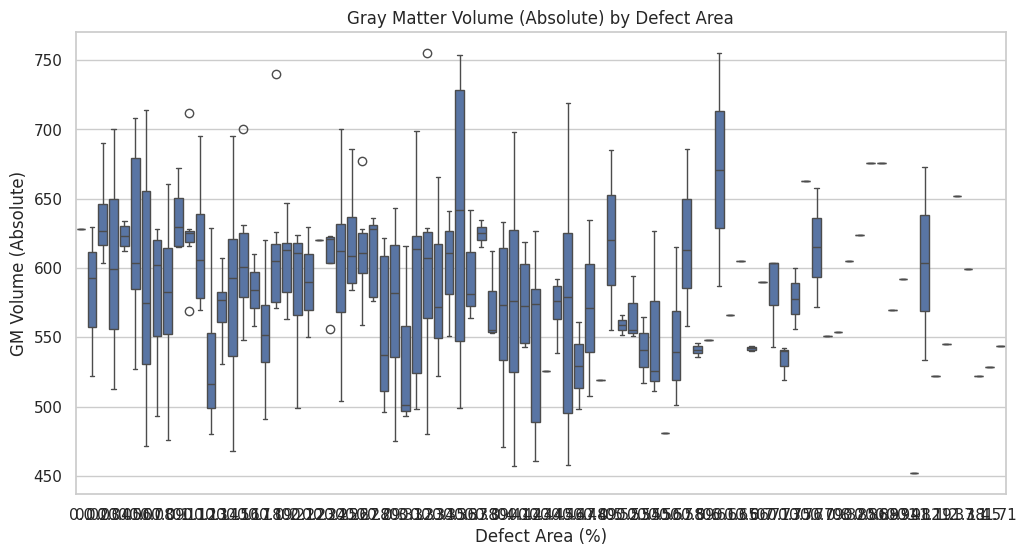

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Defect Area (%)', y='GM Volume (Absolute)', data=data)
plt.title('Gray Matter Volume (Absolute) by Defect Area')
plt.xlabel('Defect Area (%)')
plt.ylabel('GM Volume (Absolute)')
plt.show()

In [ ]:
mean_values = data.groupby('Defect Area (%)').mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Defect Area (%)', y='GM Volume (Absolute)', data=mean_values)
plt.title('Mean Gray Matter Volume (Absolute) by Defect Area')
plt.xlabel('Defect Area (%)')
plt.ylabel('Mean GM Volume (Absolute)')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
data['Thickness (mm)'] = data['Thickness (mm)'].str.extract('([\d.]+)').astype(float)

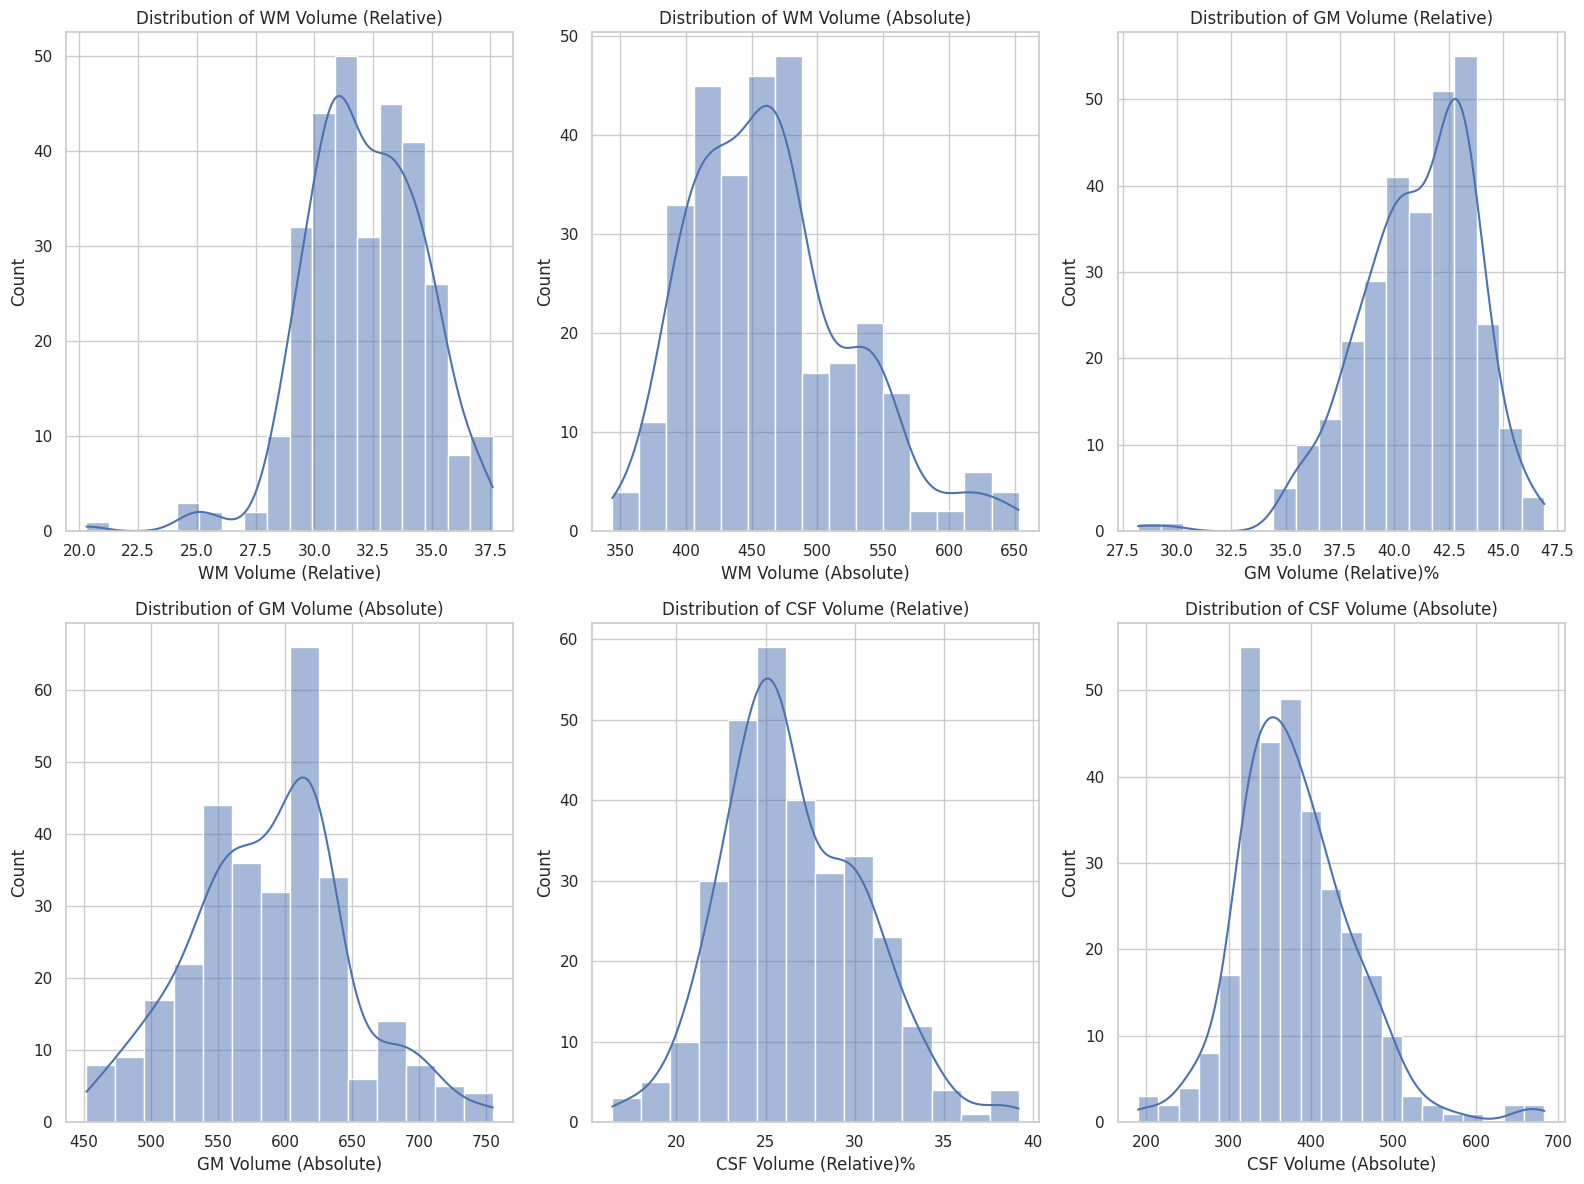

In [ ]:
plt.figure(figsize=(16, 12))

# WM Volume
plt.subplot(2, 3, 1)
sns.histplot(data['WM Volume (Relative)'], kde=True)
plt.title('Distribution of WM Volume (Relative)')

# WM Volume
plt.subplot(2, 3, 2)
sns.histplot(data['WM Volume (Absolute)'], kde=True)
plt.title('Distribution of WM Volume (Absolute)')

# GM Volume
plt.subplot(2, 3, 3)
sns.histplot(data['GM Volume (Relative)%'], kde=True)
plt.title('Distribution of GM Volume (Relative)')

# GM Volume (Absolute)
plt.subplot(2, 3, 4)
sns.histplot(data['GM Volume (Absolute)'], kde=True)
plt.title('Distribution of GM Volume (Absolute)')

# CSF Volume (Relative)
plt.subplot(2, 3, 5)
sns.histplot(data['CSF Volume (Relative)%'], kde=True)
plt.title('Distribution of CSF Volume (Relative)')

# CSF Volume (Absolute)
plt.subplot(2, 3, 6)
sns.histplot(data['CSF Volume (Absolute)'], kde=True)
plt.title('Distribution of CSF Volume (Absolute)')

plt.tight_layout()
plt.show()

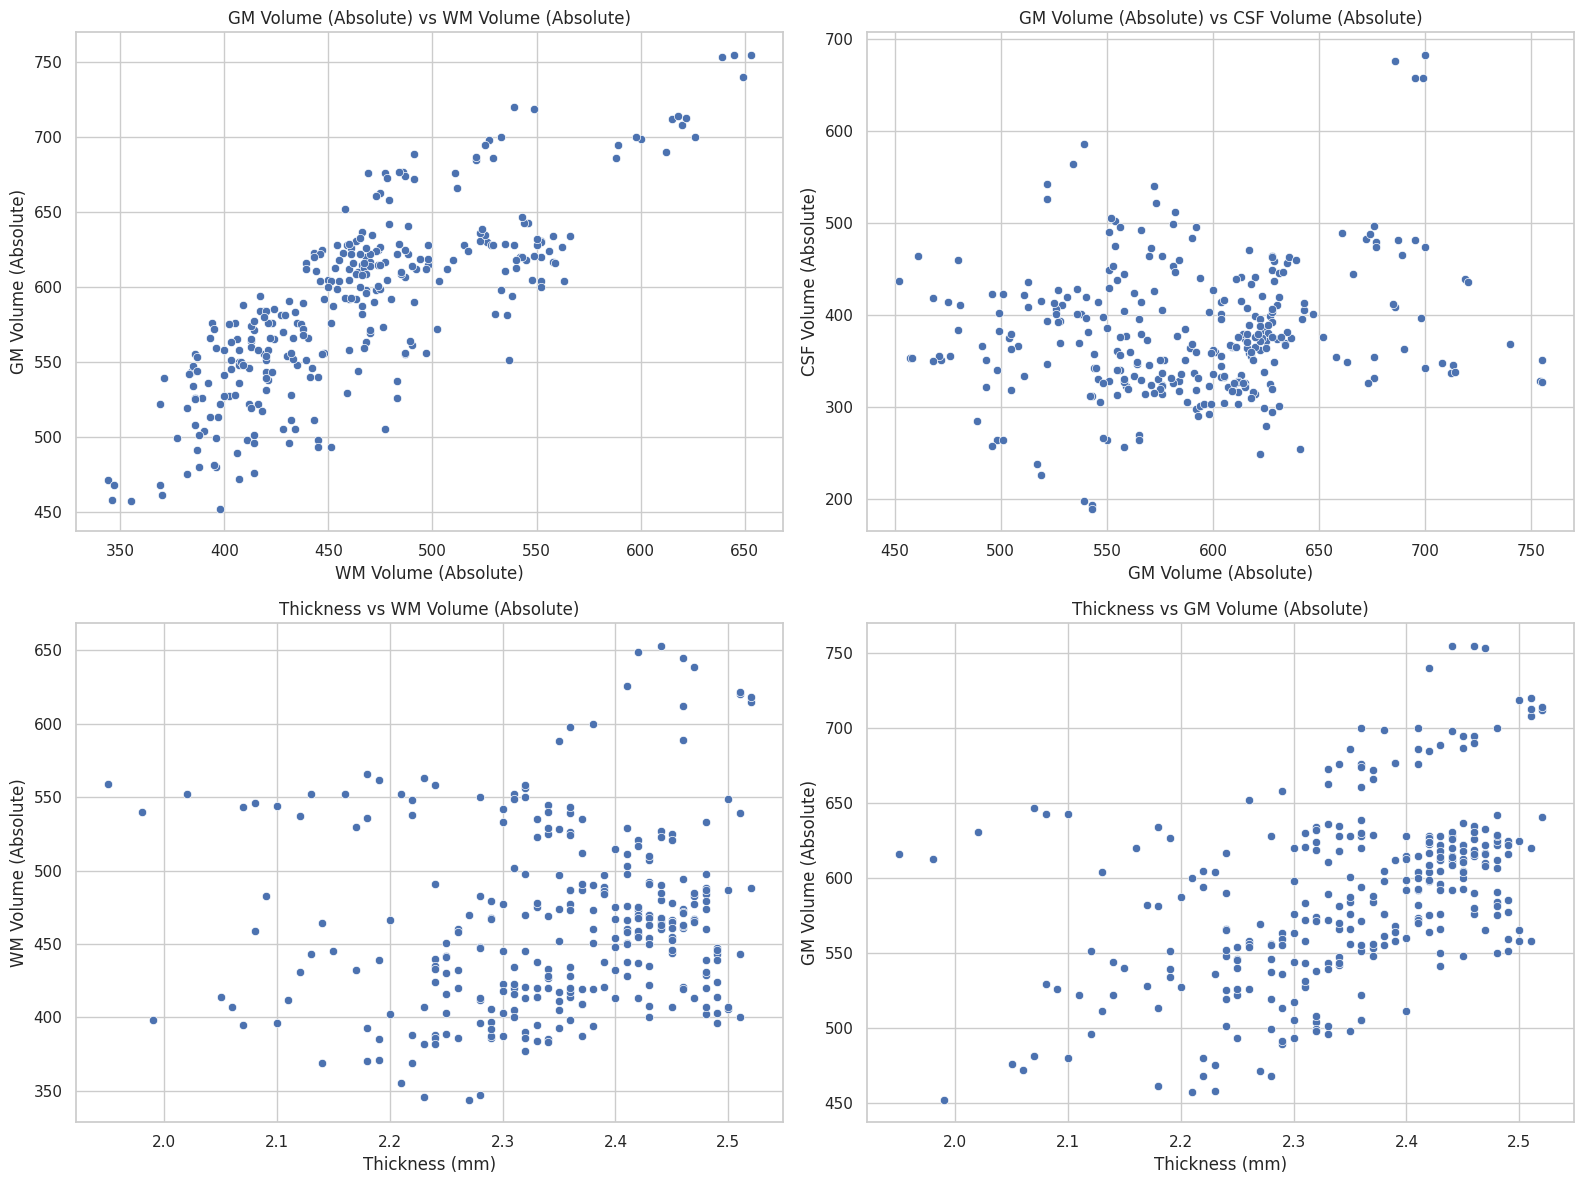

In [ ]:
plt.figure(figsize=(16, 12))

#(Absolute) vs WM Volume (Absolute)
plt.subplot(2, 2, 1)
sns.scatterplot(x='WM Volume (Absolute)', y='GM Volume (Absolute)', data=data)
plt.title('GM Volume (Absolute) vs WM Volume (Absolute)')

# (Absolute) vs CSF Volume (Absolute)
plt.subplot(2, 2, 2)
sns.scatterplot(x='GM Volume (Absolute)', y='CSF Volume (Absolute)', data=data)
plt.title('GM Volume (Absolute) vs CSF Volume (Absolute)')

# Thickness vs WM Volume (Absolute)
plt.subplot(2, 2, 3)
sns.scatterplot(x='Thickness (mm)', y='WM Volume (Absolute)', data=data)
plt.title('Thickness vs WM Volume (Absolute)')

# Thickness vs GM Volume (Absolute)
plt.subplot(2, 2, 4)
sns.scatterplot(x='Thickness (mm)', y='GM Volume (Absolute)', data=data)
plt.title('Thickness vs GM Volume (Absolute)')

plt.tight_layout()
plt.show()

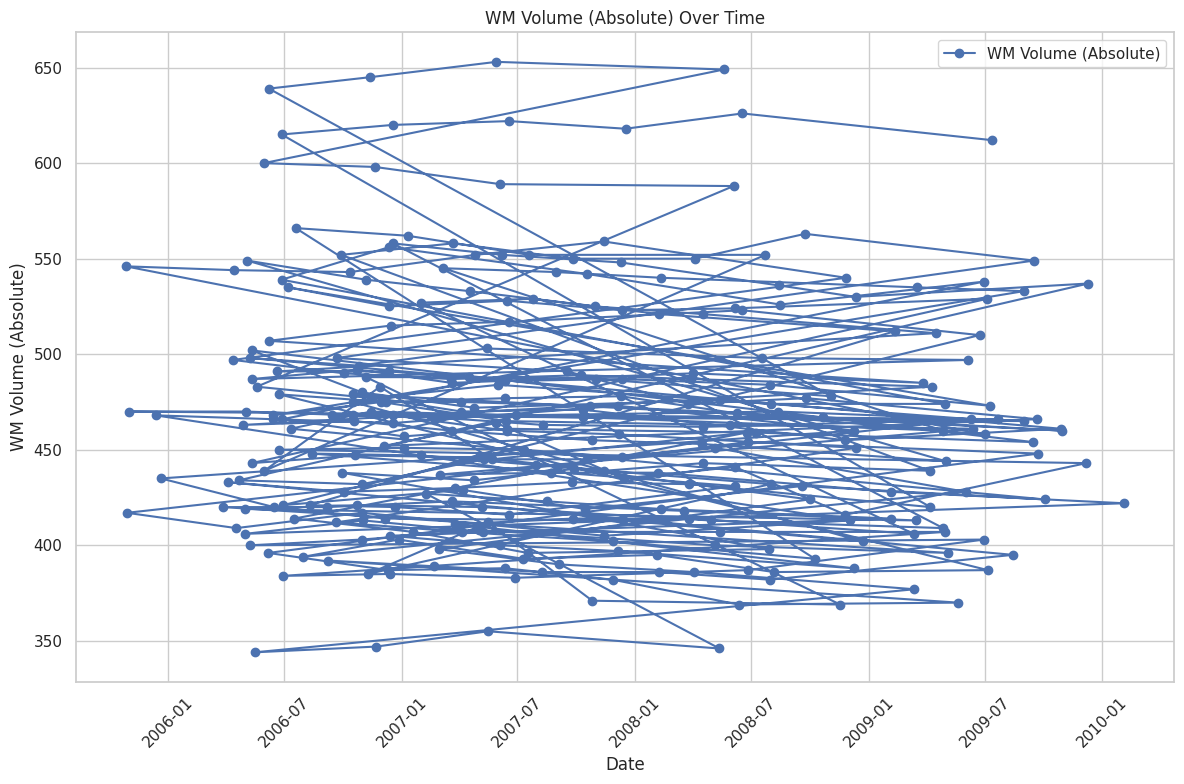

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(12, 8))

plt.plot(data['Date'], data['WM Volume (Absolute)'], marker='o', linestyle='-', color='b', label='WM Volume (Absolute)')
plt.xlabel('Date')
plt.ylabel('WM Volume (Absolute)')
plt.title('WM Volume (Absolute) Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

group1 = data[data['AD'] == 'Alzheimer']['GM Volume (Absolute)']
group2 = data[data['CN'] == 'Healthy']['GM Volume (Absolute)']

t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)

print(f'T-statistic: {t_stat}, P-value: {p_val}')

KeyError: 'AD'

In [ ]:
print(data.columns)

Index(['ID', 'Defect Area (%)', 'IQR (Weighted Avg) %', 'TIV',
       'WM Volume (Relative)', 'WM Volume (Absolute)', 'GM Volume (Relative)%',
       'GM Volume (Absolute)', 'CSF Volume (Relative)%',
       'CSF Volume (Absolute)', 'Thickness (mm)', 'Date'],
      dtype='object')


In [ ]:
group1 = data[data['ID'].str.contains('AD')]['GM Volume (Absolute)']
group2 = data[data['ID'].str.contains('Healthy')]['GM Volume (Absolute)']

In [ ]:
data['Group'] = data['ID'].apply(lambda x: 'AD' if 'AD' in x else 'Healthy')

group_ad = data[data['Group'] == 'AD']
group_healthy = data[data['Group'] == 'Healthy']

from scipy import stats
t_stat, p_val = stats.ttest_ind(group_ad['GM Volume (Absolute)'], group_healthy['GM Volume (Absolute)'])
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: -3.4038610561254816, P-value: 0.0007538500493965171


In [ ]:
from scipy import stats

group_ad = data[data['Group'] == 'AD']['GM Volume (Absolute)']
group_healthy = data[data['Group'] == 'Healthy']['GM Volume (Absolute)']

t_stat, p_val = stats.ttest_ind(group_ad, group_healthy, equal_var=False)  # Assuming unequal variance

print(f'T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}')

T-statistic: -2.707, P-value: 0.008


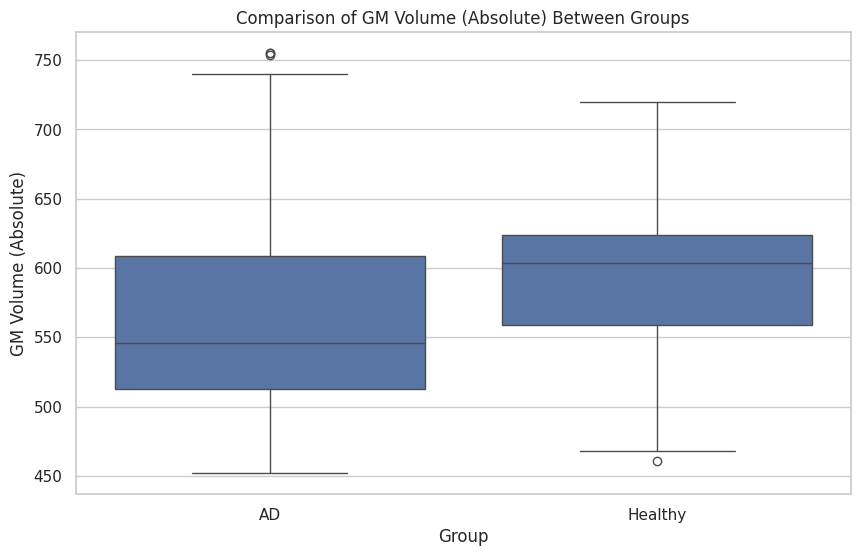

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = data[['Group', 'GM Volume (Absolute)']]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='GM Volume (Absolute)', data=plot_data)
plt.title('Comparison of GM Volume (Absolute) Between Groups')
plt.xlabel('Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()

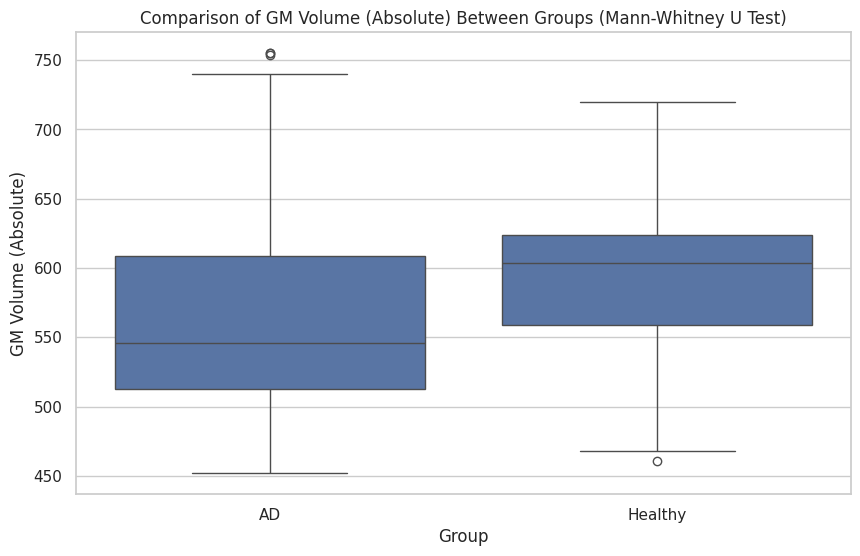

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='GM Volume (Absolute)', data=plot_data)
plt.title('Comparison of GM Volume (Absolute) Between Groups (Mann-Whitney U Test)')
plt.xlabel('Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()

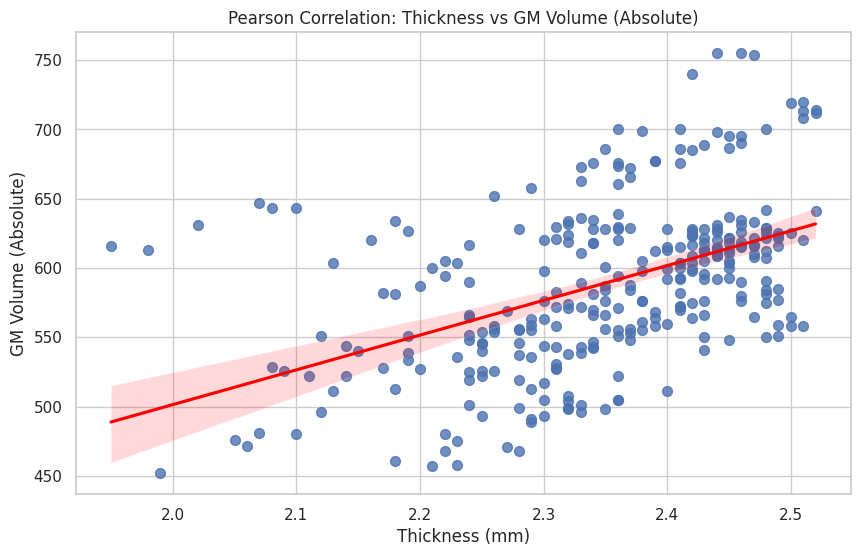

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Thickness (mm)', y='GM Volume (Absolute)', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Pearson Correlation: Thickness vs GM Volume (Absolute)')
plt.xlabel('Thickness (mm)')
plt.ylabel('GM Volume (Absolute)')
plt.show()

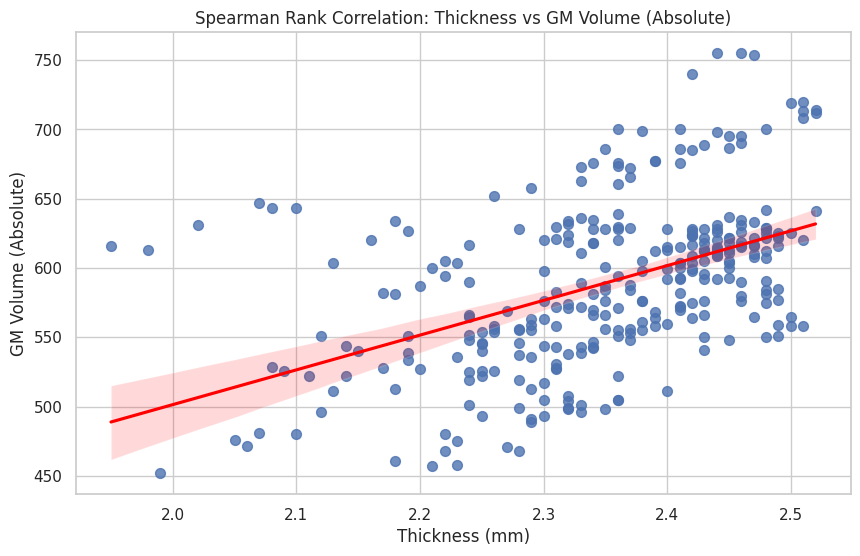

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Thickness (mm)', y='GM Volume (Absolute)', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Spearman Rank Correlation: Thickness vs GM Volume (Absolute)')
plt.xlabel('Thickness (mm)')
plt.ylabel('GM Volume (Absolute)')
plt.show()

In [ ]:
group1 = data[data['ID'].str.contains('AD')]['GM Volume (Absolute)']
group2 = data[data['ID'].str.contains('CN')]['GM Volume (Absolute)']
group3 = data[data['ID'].str.contains('MCI')]['GM Volume (Absolute)']

Saving DATA.xlsx to DATA (3).xlsx
              ID  Defect Area (%)  IQR (Weighted Avg) %   TIV  \
0  AD-002_S_1018             0.15                 85.18  1359   
1  AD-002_S_1018             0.45                 85.14  1350   
2  AD-002_S_1018             0.25                 85.20  1342   
3  AD-002_S_1018             0.09                 85.16  1343   
4  AD-005_S_0814             0.18                 84.84  1373   

   WM Volume (Relative)  WM Volume (Absolute)  GM Volume (Relative)%  \
0                  34.4                   468                   44.0   
1                  34.1                   460                   43.8   
2                  34.2                   458                   44.2   
3                  33.6                   451                   42.9   
4                  30.0                   412                   39.8   

   GM Volume (Absolute)  CSF Volume (Relative)%  CSF Volume (Absolute)  \
0                   598                    21.5                    2

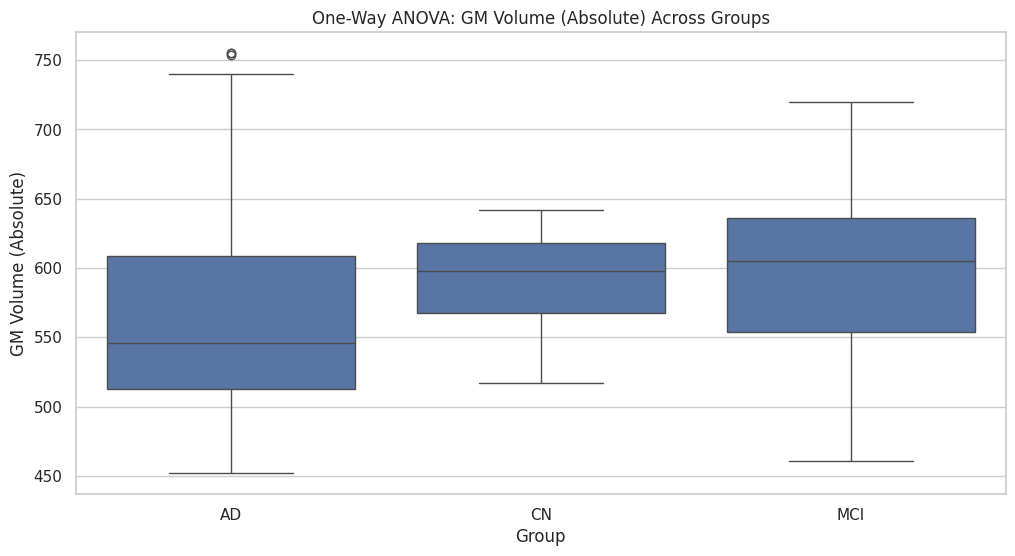

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded.keys()))
data = pd.read_excel(file_name)

print(data.head())

data['Group'] = data['ID'].apply(lambda x: 'AD' if 'AD' in x else ('MCI' if 'MCI' in x else 'CN'))

data['GM Volume (Absolute)'] = pd.to_numeric(data['GM Volume (Absolute)'], errors='coerce')
data['Thickness (mm)'] = pd.to_numeric(data['Thickness (mm)'].str.extract(r'([\d.]+)')[0], errors='coerce')

group_ad = data[data['Group'] == 'AD']['GM Volume (Absolute)']
group_mci = data[data['Group'] == 'MCI']['GM Volume (Absolute)']
group_cn = data[data['Group'] == 'CN']['GM Volume (Absolute)']

f_stat, p_val = stats.f_oneway(group_ad.dropna(), group_mci.dropna(), group_cn.dropna())
print(f'ANOVA F-statistic: {f_stat}, P-value: {p_val}')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='GM Volume (Absolute)', data=data)
plt.title('One-Way ANOVA: GM Volume (Absolute) Across Groups')
plt.xlabel('Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()

In [ ]:
from scipy.stats import kruskal

group_ad = data[data['Group'] == 'AD']['GM Volume (Absolute)']
group_mci = data[data['Group'] == 'MCI']['GM Volume (Absolute)']
group_cn = data[data['Group'] == 'CN']['GM Volume (Absolute)']

h_stat, p_val = kruskal(group_ad.dropna(), group_mci.dropna(), group_cn.dropna())
print(f'Kruskal-Wallis H Statistic: {h_stat}, P-value: {p_val}')

Kruskal-Wallis H Statistic: 16.749506786551276, P-value: 0.00023061673221746928


In [ ]:
pearson_corr = data[['GM Volume (Absolute)', 'TIV']].dropna().corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr)

spearman_corr = data[['GM Volume (Absolute)', 'TIV']].dropna().corr(method='spearman')
print("Spearman Correlation:\n", spearman_corr)

Pearson Correlation:
                       GM Volume (Absolute)       TIV
GM Volume (Absolute)              1.000000  0.821368
TIV                               0.821368  1.000000
Spearman Correlation:
                       GM Volume (Absolute)       TIV
GM Volume (Absolute)              1.000000  0.824673
TIV                               0.824673  1.000000


In [ ]:
import statsmodels.api as sm

X = data[['TIV']].dropna()
y = data['GM Volume (Absolute)'].dropna()
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

X_multi = data[['TIV', 'IQR (Weighted Avg) %']].dropna()
y_multi = data['GM Volume (Absolute)'].dropna()
X_multi = sm.add_constant(X_multi)

model_multi = sm.OLS(y_multi, X_multi).fit()
print(model_multi.summary())

                             OLS Regression Results                             
Dep. Variable:     GM Volume (Absolute)   R-squared:                       0.675
Model:                              OLS   Adj. R-squared:                  0.674
Method:                   Least Squares   F-statistic:                     628.3
Date:                  Wed, 18 Sep 2024   Prob (F-statistic):           7.37e-76
Time:                          19:29:44   Log-Likelihood:                -1504.3
No. Observations:                   305   AIC:                             3013.
Df Residuals:                       303   BIC:                             3020.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.5327     19.187

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data['Binary Group'] = data['Group'].apply(lambda x: 1 if x == 'AD' else 0)

X_logistic = data[['TIV', 'IQR (Weighted Avg) %']].dropna()
y_logistic = data['Binary Group'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        72
           1       0.00      0.00      0.00        20

    accuracy                           0.78        92
   macro avg       0.39      0.50      0.44        92
weighted avg       0.61      0.78      0.69        92



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ANOVA F-statistic: 6.178200573050187, P-value: 0.0023457398751047893


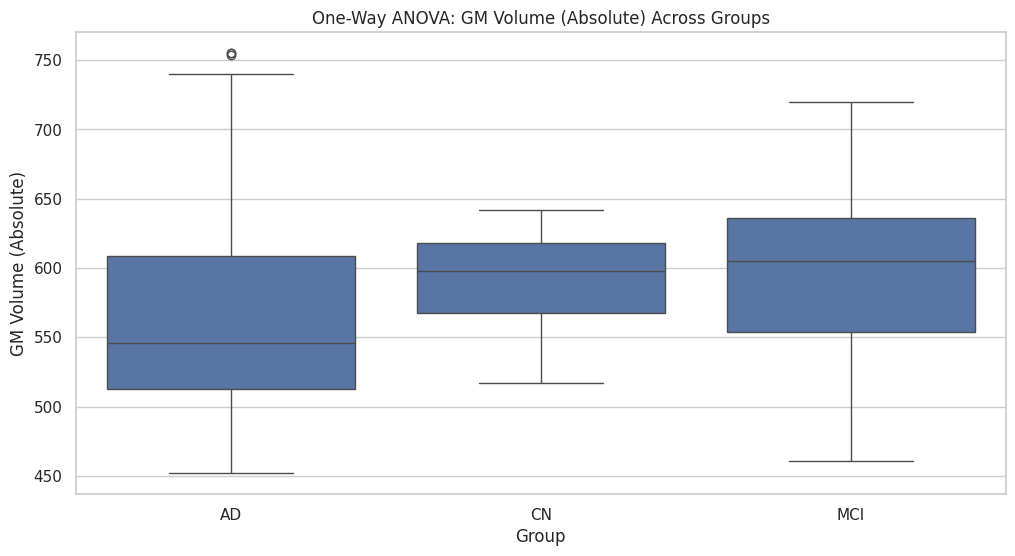

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

f_stat, p_val = f_oneway(group_ad.dropna(), group_mci.dropna(), group_cn.dropna())
print(f'ANOVA F-statistic: {f_stat}, P-value: {p_val}')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='GM Volume (Absolute)', data=data)
plt.title('One-Way ANOVA: GM Volume (Absolute) Across Groups')
plt.xlabel('Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()

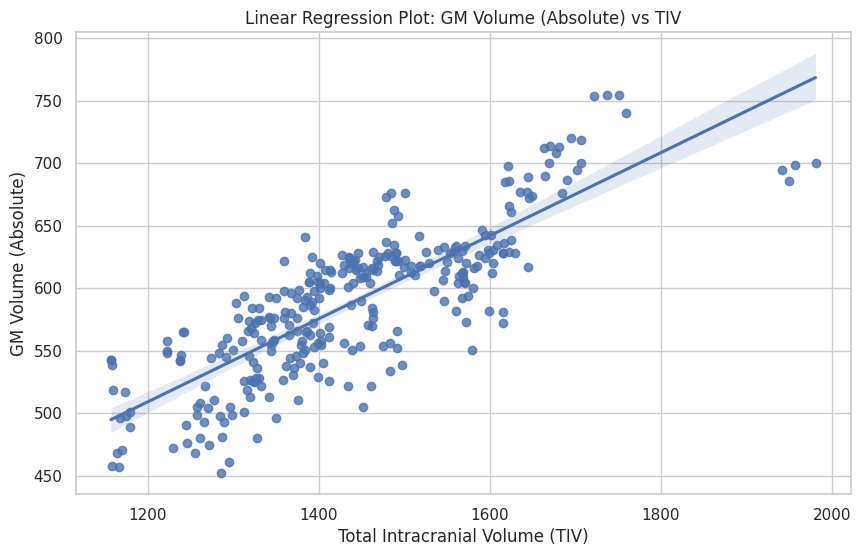

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='TIV', y='GM Volume (Absolute)', data=data)
plt.title('Linear Regression Plot: GM Volume (Absolute) vs TIV')
plt.xlabel('Total Intracranial Volume (TIV)')
plt.ylabel('GM Volume (Absolute)')
plt.show()

              ID  Defect Area (%)  IQR (Weighted Avg) %   TIV  \
0  AD-002_S_1018             0.15                 85.18  1359   
1  AD-002_S_1018             0.45                 85.14  1350   
2  AD-002_S_1018             0.25                 85.20  1342   
3  AD-002_S_1018             0.09                 85.16  1343   
4  AD-005_S_0814             0.18                 84.84  1373   

   WM Volume (Relative)  WM Volume (Absolute)  GM Volume (Relative)%  \
0                  34.4                   468                   44.0   
1                  34.1                   460                   43.8   
2                  34.2                   458                   44.2   
3                  33.6                   451                   42.9   
4                  30.0                   412                   39.8   

   GM Volume (Absolute)  CSF Volume (Relative)%  CSF Volume (Absolute)  \
0                   598                    21.5                    293   
1                   592     

<Figure size 1200x600 with 0 Axes>

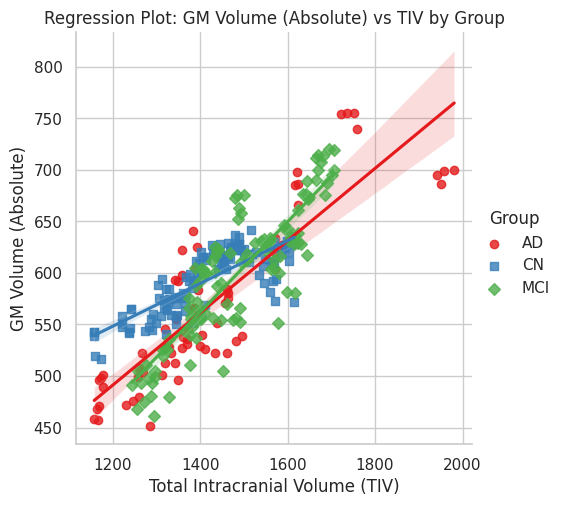

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('DATA.xlsx')

print(data.head())

data['Group'] = data['ID'].apply(lambda x: 'AD' if 'AD' in x else ('MCI' if 'MCI' in x else 'CN'))

plt.figure(figsize=(12, 6))
sns.lmplot(x='TIV', y='GM Volume (Absolute)', data=data, hue='Group', markers=['o', 's', 'D'], palette='Set1')
plt.title('Regression Plot: GM Volume (Absolute) vs TIV by Group')
plt.xlabel('Total Intracranial Volume (TIV)')
plt.ylabel('GM Volume (Absolute)')
plt.show()

<Figure size 1200x600 with 0 Axes>

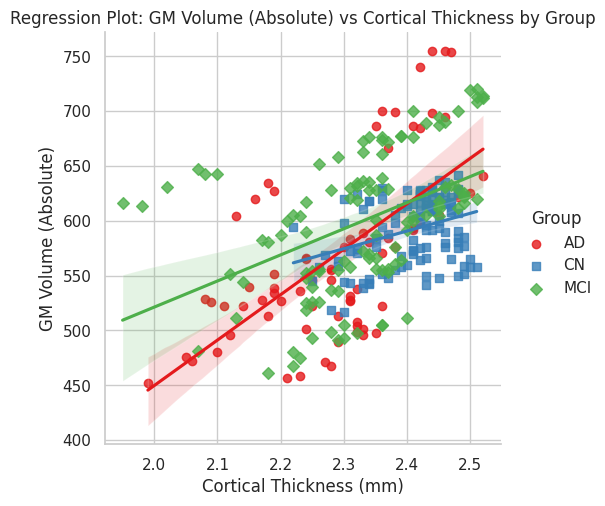

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('DATA.xlsx')

data['Group'] = data['ID'].apply(lambda x: 'AD' if 'AD' in x else ('MCI' if 'MCI' in x else 'CN'))

data['Thickness (mm)'] = data['Thickness (mm)'].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(12, 6))
sns.lmplot(x='Thickness (mm)', y='GM Volume (Absolute)', data=data, hue='Group', markers=['o', 's', 'D'], palette='Set1')
plt.title('Regression Plot: GM Volume (Absolute) vs Cortical Thickness by Group')
plt.xlabel('Cortical Thickness (mm)')
plt.ylabel('GM Volume (Absolute)')
plt.show()

In [ ]:
print(data.columns)

Index(['ID', 'Defect Area (%)', 'IQR (Weighted Avg) %', 'TIV',
       'WM Volume (Relative)', 'WM Volume (Absolute)', 'GM Volume (Relative)%',
       'GM Volume (Absolute)', 'CSF Volume (Relative)%',
       'CSF Volume (Absolute)', 'Thickness (mm)', 'Date', 'Group'],
      dtype='object')


ANOVA F-statistic: 36.72816014105412, P-value: 5.279296418949074e-15


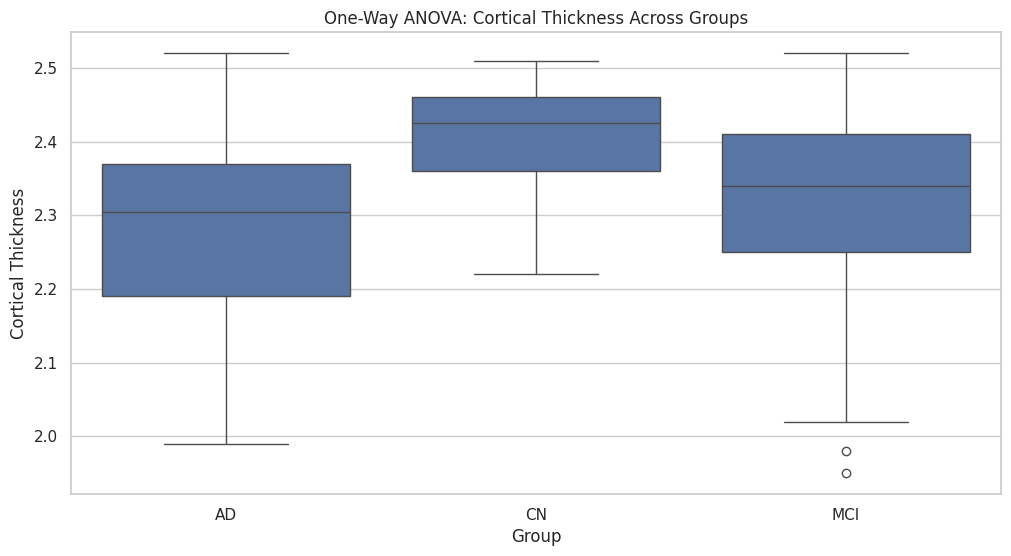

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

group_ad = data[data['Group'] == 'AD']['Thickness (mm)']
group_mci = data[data['Group'] == 'MCI']['Thickness (mm)']
group_cn = data[data['Group'] == 'CN']['Thickness (mm)']

f_stat, p_val = f_oneway(group_ad.dropna(), group_mci.dropna(), group_cn.dropna())
print(f'ANOVA F-statistic: {f_stat}, P-value: {p_val}')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Thickness (mm)', data=data)
plt.title('One-Way ANOVA: Cortical Thickness Across Groups')
plt.xlabel('Group')
plt.ylabel('Cortical Thickness')
plt.show()

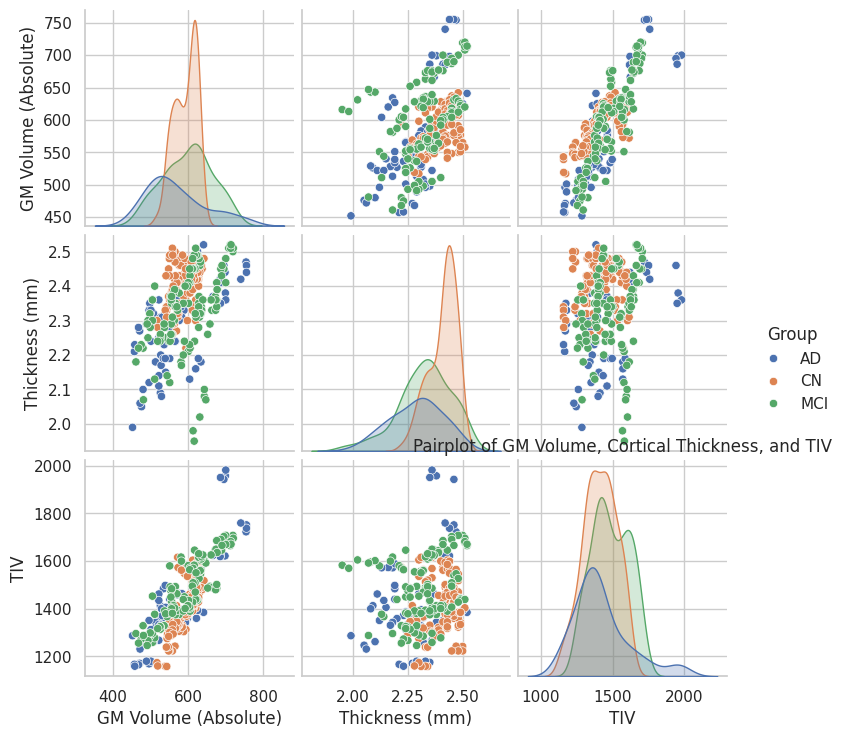

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['GM Volume (Absolute)', 'Thickness (mm)', 'TIV', 'Group']], hue='Group')
plt.title('Pairplot of GM Volume, Cortical Thickness, and TIV')
plt.show()

<Figure size 1200x600 with 0 Axes>

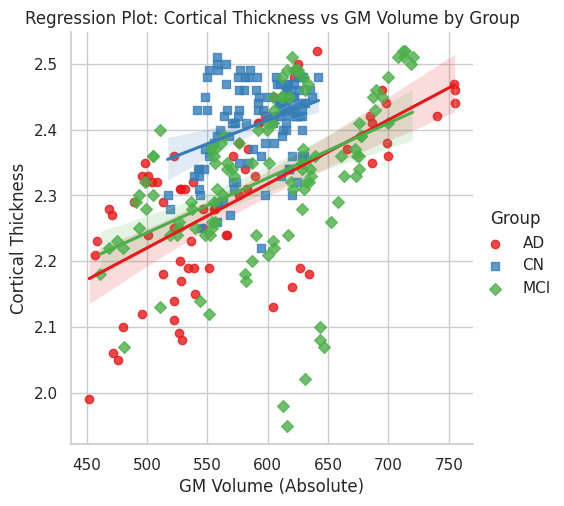

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lmplot(x='GM Volume (Absolute)', y='Thickness (mm)', data=data, hue='Group', markers=['o', 's', 'D'], palette='Set1')
plt.title('Regression Plot: Cortical Thickness vs GM Volume by Group')
plt.xlabel('GM Volume (Absolute)')
plt.ylabel('Cortical Thickness')
plt.show()

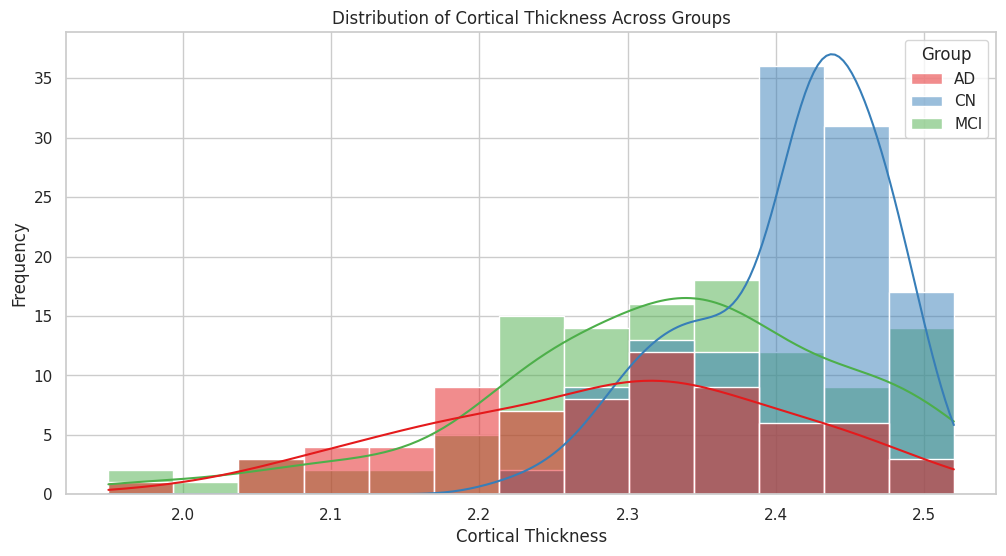

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data, x='Thickness (mm)', hue='Group', kde=True, palette='Set1')
plt.title('Distribution of Cortical Thickness Across Groups')
plt.xlabel('Cortical Thickness')
plt.ylabel('Frequency')
plt.show()

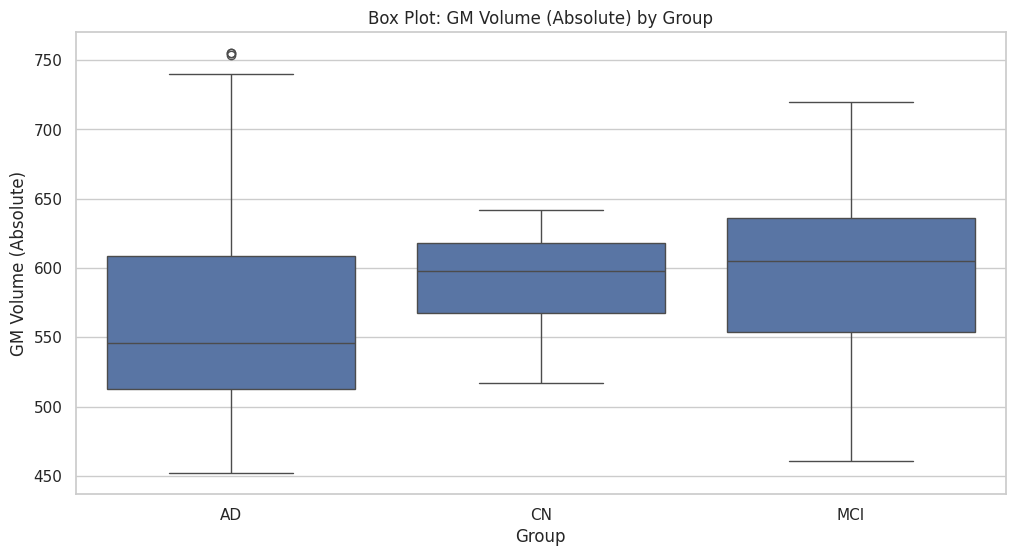

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='GM Volume (Absolute)', data=data)
plt.title('Box Plot: GM Volume (Absolute) by Group')
plt.xlabel('Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()

  Group  GM Volume (Absolute)
0    AD            568.722222
1    CN            592.058333
2   MCI            598.761062


<ipython-input-147-e1e3cec7ddcb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='GM Volume (Absolute)', data=mean_gm_volume, palette='Set2')


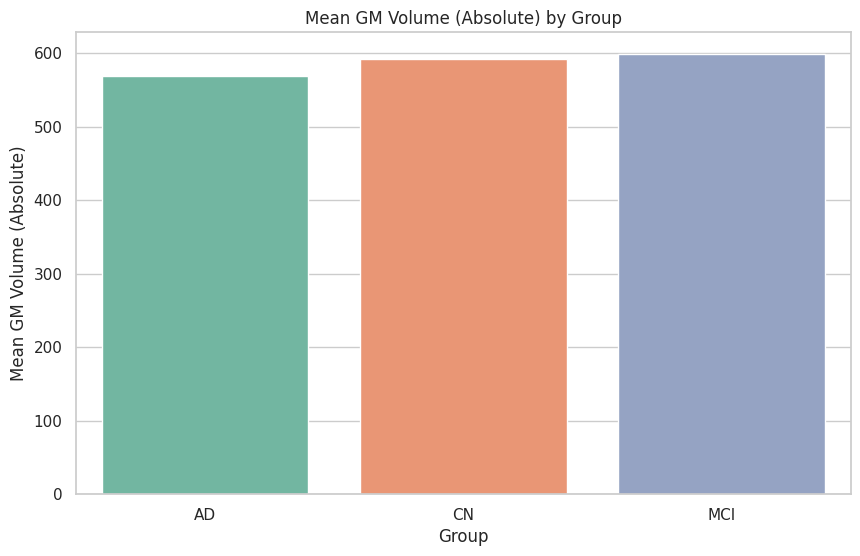

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mean_gm_volume = data.groupby('Group')['GM Volume (Absolute)'].mean().reset_index()

print(mean_gm_volume)

plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='GM Volume (Absolute)', data=mean_gm_volume, palette='Set2')
plt.title('Mean GM Volume (Absolute) by Group')
plt.xlabel('Group')
plt.ylabel('Mean GM Volume (Absolute)')
plt.show()

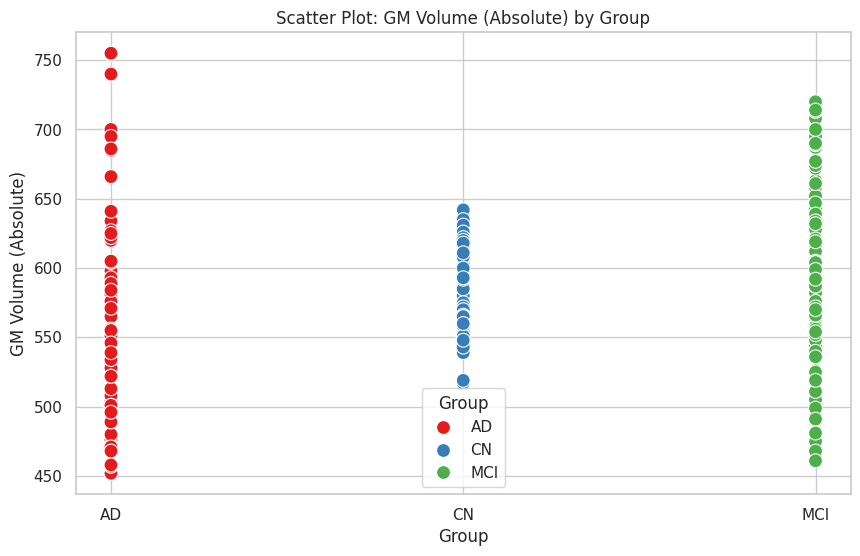

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Group', y='GM Volume (Absolute)', data=data, hue='Group', palette='Set1', s=100)
plt.title('Scatter Plot: GM Volume (Absolute) by Group')
plt.xlabel('Group')
plt.ylabel('GM Volume (Absolute)')
plt.show()

<Figure size 1000x600 with 0 Axes>

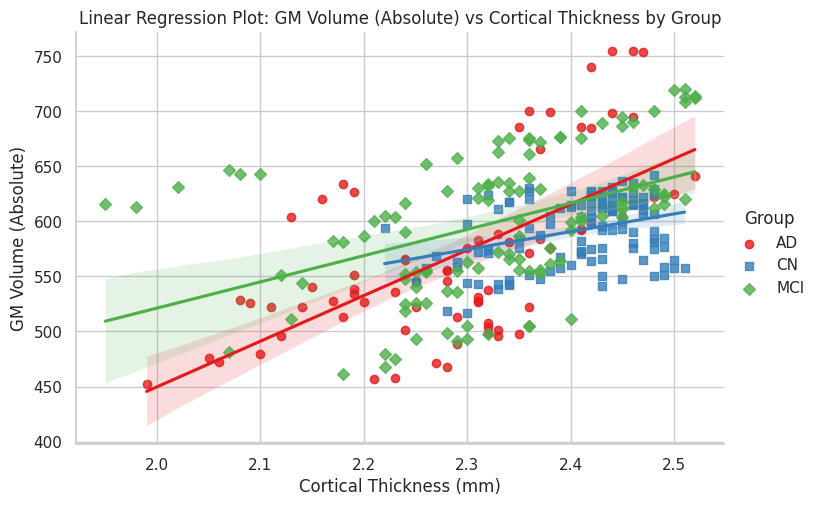

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lmplot(x='Thickness (mm)', y='GM Volume (Absolute)', data=data, hue='Group', markers=['o', 's', 'D'], palette='Set1', aspect=1.5)
plt.title('Linear Regression Plot: GM Volume (Absolute) vs Cortical Thickness by Group')
plt.xlabel('Cortical Thickness (mm)')
plt.ylabel('GM Volume (Absolute)')
plt.show()

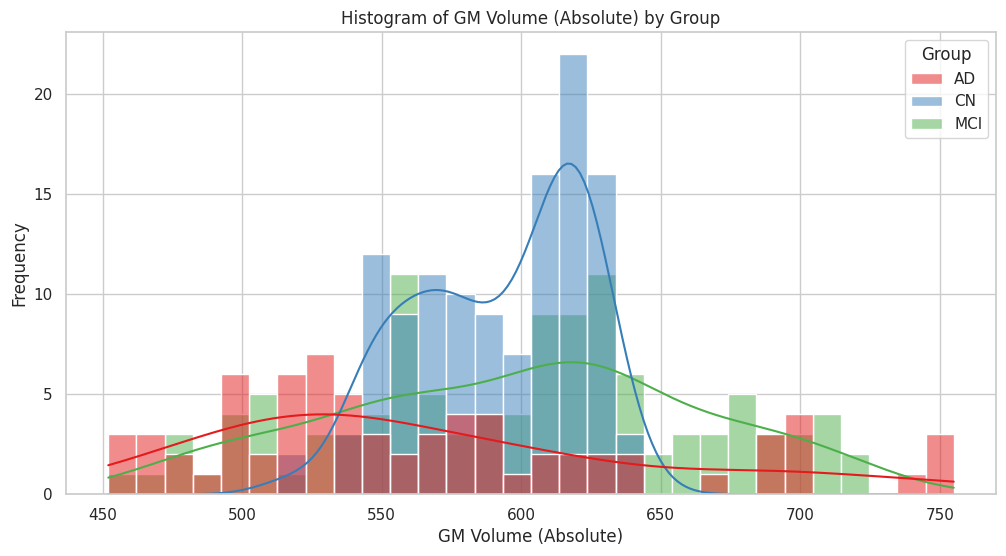

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='GM Volume (Absolute)', hue='Group', kde=True, bins=30, palette='Set1')
plt.title('Histogram of GM Volume (Absolute) by Group')
plt.xlabel('GM Volume (Absolute)')
plt.ylabel('Frequency')
plt.show()

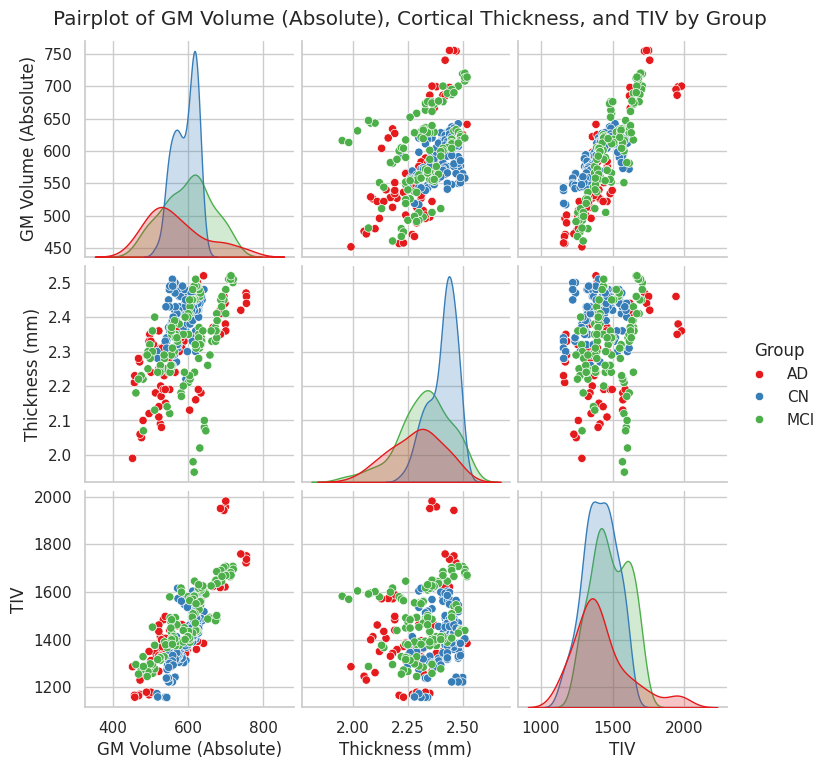

In [ ]:
sns.pairplot(data=data, vars=['GM Volume (Absolute)', 'Thickness (mm)', 'TIV'], hue='Group', palette='Set1')
plt.suptitle('Pairplot of GM Volume (Absolute), Cortical Thickness, and TIV by Group', y=1.02)
plt.show()

<ipython-input-152-b13afe6cc08e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Thickness (mm)', data=data, palette='Set1')


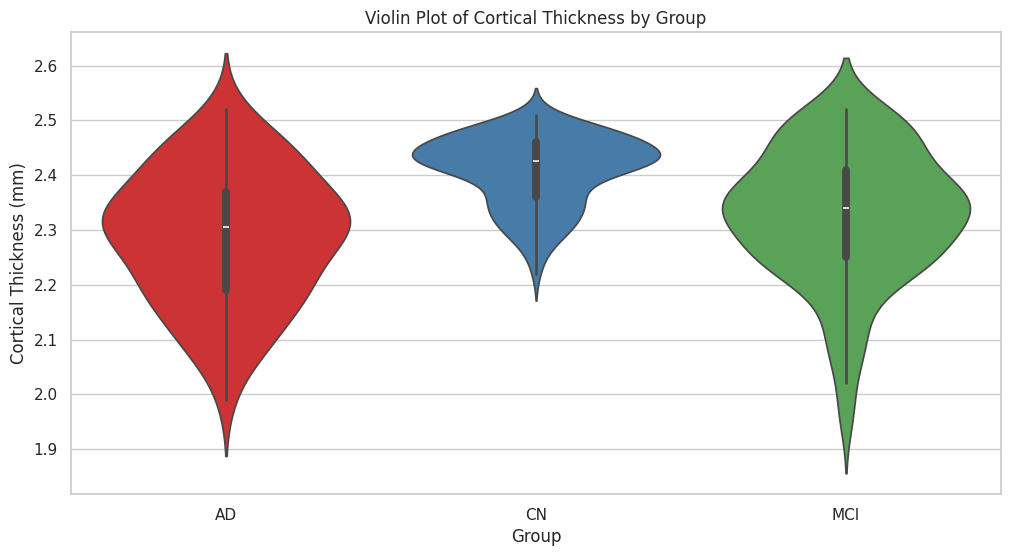

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Group', y='Thickness (mm)', data=data, palette='Set1')
plt.title('Violin Plot of Cortical Thickness by Group')
plt.xlabel('Group')
plt.ylabel('Cortical Thickness (mm)')
plt.show()


<ipython-input-153-17bb7b7c5a2b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Group', y='GM Volume (Relative)%', data=data, palette='Set1', ci='sd')
<ipython-input-153-17bb7b7c5a2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='GM Volume (Relative)%', data=data, palette='Set1', ci='sd')


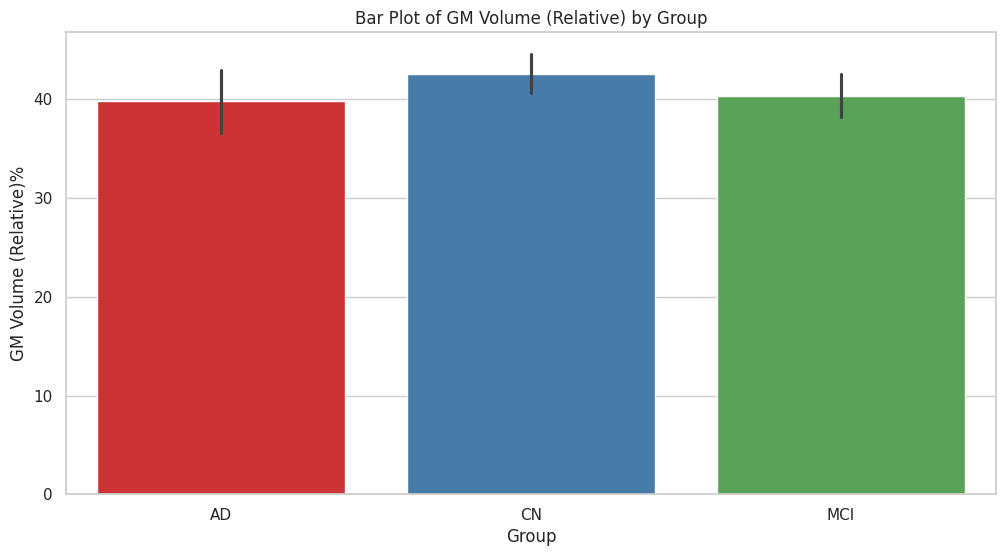

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='GM Volume (Relative)%', data=data, palette='Set1', ci='sd')
plt.title('Bar Plot of GM Volume (Relative) by Group')
plt.xlabel('Group')
plt.ylabel('GM Volume (Relative)%')
plt.show()

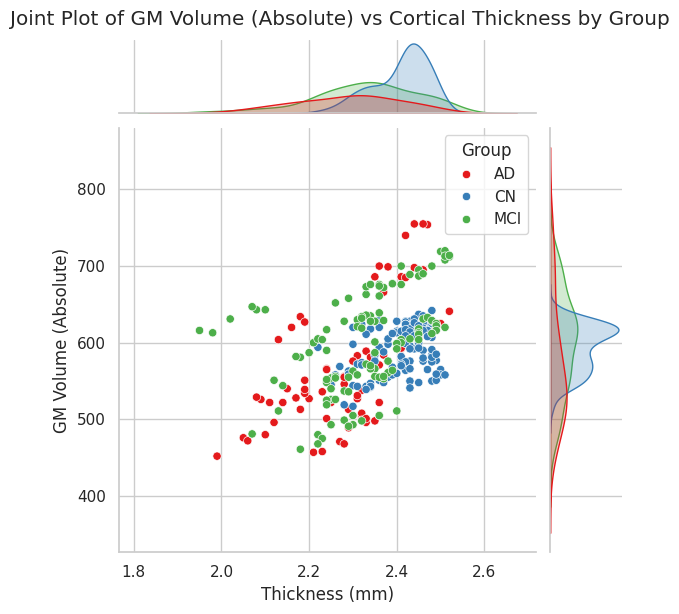

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x='Thickness (mm)', y='GM Volume (Absolute)', data=data, hue='Group', kind='scatter', palette='Set1')

plt.suptitle('Joint Plot of GM Volume (Absolute) vs Cortical Thickness by Group', y=1.02)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true, y=y_pred, hue=data['Group'], palette='Set1')

plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')

plt.title('True vs Predicted GM Volume (Absolute)')
plt.xlabel('True GM Volume (Absolute)')
plt.ylabel('Predicted GM Volume (Absolute)')
plt.show()

NameError: name 'y_true' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


X = data[features]
y = data[target]

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X, y, cv=kf)

r2 = r2_score(y, y_pred)
print(f'R2 Score: {r2:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, label='Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal')
plt.title(f'True vs Predicted {target} Scores')
plt.xlabel(f'True {target}')
plt.ylabel(f'Predicted {target}')
plt.legend()
plt.show()

n_permutations = 10000
random_corrs = []


for i in range(n_permutations):
    shuffled_y = np.random.permutation(y)
    shuffled_y_pred = cross_val_predict(model, X, shuffled_y, cv=kf)
    random_corr = np.corrcoef(shuffled_y, shuffled_y_pred)[0, 1]
    random_corrs.append(random_corr)

actual_corr = np.corrcoef(y, y_pred)[0, 1]

plt.hist(random_corrs, bins=50, color='lightblue', alpha=0.7)
plt.axvline(actual_corr, color='red', linestyle='--', label=f'Actual Correlation: {actual_corr:.2f}')
plt.title('Permutation Test: Predicted vs True Scores')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()


NameError: name 'features' is not defined